By Sayak Chowdhury and Ronak Sarkar

Data: https://www.kaggle.com/datasets/zalando-research/fashionmnist

**Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time as time
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_graphviz
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict,RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, average_precision_score,precision_score, recall_score, f1_score,ConfusionMatrixDisplay, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler,label_binarize
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import os

**Training Set Import**

In [ ]:
train_set = pd.read_csv(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\fashion emnist\fashion_train.csv")

**Test Set Import**

In [ ]:
test_set= pd.read_csv(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\fashion emnist\fashion_test.csv")

**Description Of Training Set**

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
train_set.describe()

label        pixel1        pixel2        pixel3        pixel4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       4.500000      0.000900      0.006150      0.035333      0.101933   
std        2.872305      0.094689      0.271011      1.222324      2.452871   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000     16.000000     36.000000    226.000000    164.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.247967      0.411467      0.805767      2.198283      5.682000   
std        4.306912      5.836188      8.215169     14.093378     23.819481   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      227.000000    230.000000    224.000000    255.000000    254.000000   

       ...      pixel775      pixel776      pixel777      pixel778  \
count  ...  60000.000000  60000.000000  60000.000000  60000.000000   
mean   ...     34.625400     23.300683     16.588267     17.869433   
std    ...     57.545242     48.854427     41.979611     43.966032   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...     58.000000      9.000000      0.000000      0.000000   
max    ...    255.000000    255.000000    255.000000    255.000000   

           pixel779      pixel780      pixel781      pixel782      pixel783  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean      22.814817     17.911483      8.520633      2.753300      0.855517   
std       51.830477     45.149388     29.614859     17.397652      9.356960   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

          pixel784  
count  60000.00000  
mean       0.07025  
std        2.12587  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        0.00000  
max      170.00000  

[8 rows x 785 columns]

In [ ]:
print("The total number of missing vcalues in each row of Train_set : ", train_set.isnull().sum())

The total number of missing vcalues in each row of Train_set :  label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


In [ ]:
if (train_set.isnull().sum() > 0).any():
    print("There are columns with missing values.")
    print("Columns with missing values and their counts:")
    print(missing_values[missing_values > 0])
else:
    print("No columns have missing values in train_set.")

No columns have missing values in train_set.


In [ ]:
print(f"Shape Of Train_set :{train_set.shape}")

Shape Of Train_set :(60000, 785)


In [ ]:
print("Names of Train_set columns: \n", train_set.columns)

Names of Train_set columns: 
 Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


In [ ]:
train_set.dtypes

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object

In [ ]:
print("Top five rows of Train_set: \n")
train_set.head()

Top five rows of Train_set: 



label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

**Test Set Info**

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [ ]:
test_set.describe()

label        pixel1        pixel2        pixel3        pixel4  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       4.500000      0.000400      0.010300      0.052100      0.077000   
std        2.872425      0.024493      0.525187      2.494315      2.208882   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000      2.000000     45.000000    218.000000    185.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.208600      0.349200      0.826700      2.321200      5.457800   
std        4.669183      5.657849      8.591731     15.031508     23.359019   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      227.000000    223.000000    247.000000    218.000000    244.000000   

       ...      pixel775      pixel776      pixel777      pixel778  \
count  ...  10000.000000  10000.000000  10000.000000  10000.000000   
mean   ...     34.320800     23.071900     16.432000     17.870600   
std    ...     57.888679     49.049749     42.159665     44.140552   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...     55.000000      6.000000      0.000000      0.000000   
max    ...    254.000000    252.000000    255.000000    255.000000   

           pixel779      pixel780      pixel781      pixel782      pixel783  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      22.860000     17.790200      8.353500      2.541600      0.629500   
std       51.706601     45.128107     28.765769     16.417363      7.462533   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max      255.000000    255.000000    240.000000    225.000000    205.000000   

          pixel784  
count  10000.00000  
mean       0.06560  
std        1.93403  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        0.00000  
max      107.00000  

[8 rows x 785 columns]

In [ ]:
print("The total number of missing vcalues in each row of Test_set : ", test_set.isnull().sum())

The total number of missing vcalues in each row of Test_set :  label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


In [ ]:
if (test_set.isnull().sum() > 0).any():
    print("There are columns with missing values.")
    print("Columns with missing values and their counts:")
    print(missing_values[missing_values > 0])
else:
    print("No columns have missing values in test_set.")

No columns have missing values in test_set.


In [ ]:
print(f"Shape Of Test_set :{test_set.shape}")

Shape Of Test_set :(10000, 785)


In [ ]:
print("Names of Test_set columns: \n",test_set.columns)

Names of Test_set columns: 
 Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


In [ ]:
test_set.dtypes

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object

In [ ]:
print("Top five rows of Train_set: \n")
test_set.head()

Top five rows of Train_set: 



label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      0       0       0       0       0       0       0       0       9   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0      14      53   
3      2       0       0       0       0       0       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       8  ...       103        87        56         0         0         0   
1       0  ...        34         0         0         0         0         0   
2      99  ...         0         0         0         0        63        53   
3       0  ...       137       126       140         0       133       224   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2        31         0         0         0  
3       222        56         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

**Names of the each items in train_set and test_set**

In [ ]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress', 'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

**Splitting the train_set into x_train and y_tarin sets**

In [ ]:
x_train=train_set.drop("label", axis=1)
y_train=train_set.iloc[:,0:1]

**Top five rows of the x_train set**

In [ ]:
print("Top five rows of x_train: \n")
x_train.head()

Top five rows of x_train: 



pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       5       0   
3       0       0       0       1       2       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0        30        43         0   
3        0  ...         3         0         0         0         0         1   
4        0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
print("Top five rows of y_train : ", x_train.shape)

Top five rows of y_train :  (60000, 784)


In [ ]:
print("Top five rows of y_train : \n", y_train.head())

Top five rows of y_train : 
    label
0      2
1      9
2      6
3      0
4      3


In [ ]:
print("Shape of y-train: ", y_train.shape)

Shape of y-train:  (60000, 1)


**Data Scaling**

**Scaling x_train with Min-Max Scaler for Improved Model Performance**

In [ ]:
scaler = MinMaxScaler()
x_train_MM_scaled=scaler.fit_transform(x_train)

In [ ]:
print(x_train_MM_scaled)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Some Images of Training set**

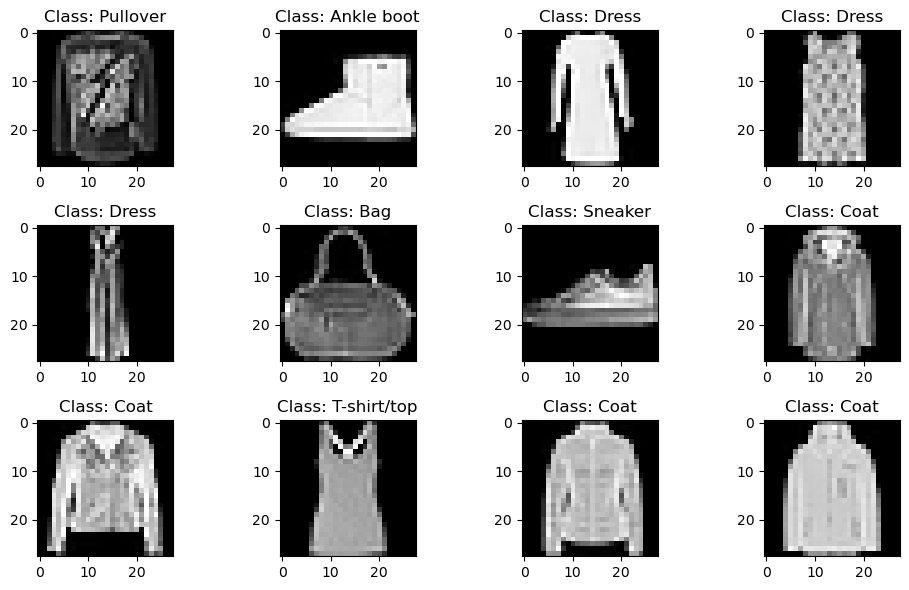

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(12):
    plt.subplot(3, 4, i+1)
    img = x_train_MM_scaled[i+15].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Class: {class_names[y_train['label'].iloc[i+15]]}")
plt.tight_layout()
plt.show()

**Selecting testing set for x_train and Normalizing**

In [ ]:
x_test=test_set.drop("label", axis=1)

In [ ]:
x_test_MM_scaled=scaler.fit_transform(x_test)

**Selecting testing set for y_train**

In [ ]:
y_test=test_set.iloc[:,0:1]

In [ ]:
y_train.values.ravel().ndim

1

## Classification using SVC classifier ##

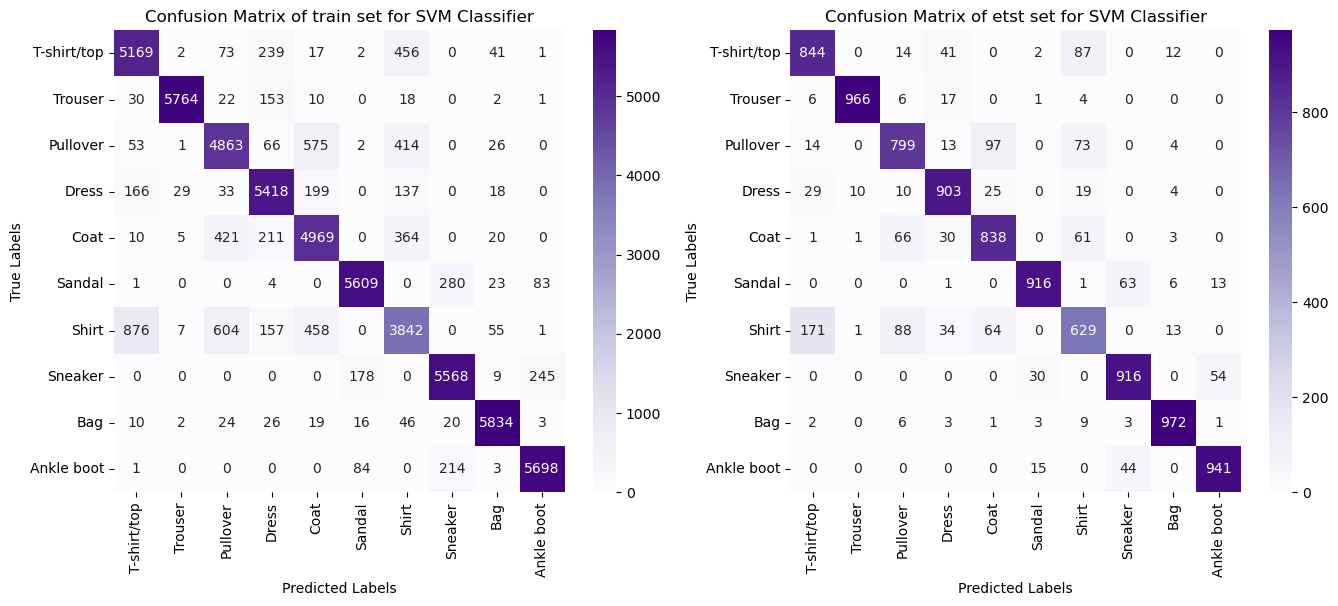


Training set Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.818398 | 0.8615   |   0.839396 |  6000      |
| 1            |    0.992083 | 0.960667 |   0.976122 |  6000      |
| 2            |    0.805132 | 0.8105   |   0.807807 |  6000      |
| 3            |    0.863564 | 0.903    |   0.882842 |  6000      |
| 4            |    0.795422 | 0.828167 |   0.811464 |  6000      |
| 5            |    0.95213  | 0.934833 |   0.943403 |  6000      |
| 6            |    0.728065 | 0.640333 |   0.681387 |  6000      |
| 7            |    0.915488 | 0.928    |   0.921702 |  6000      |
| 8            |    0.967335 | 0.972333 |   0.969828 |  6000      |
| 9            |    0.944629 | 0.949667 |   0.947141 |  6000      |
| accuracy     |    0.8789   | 0.8789   |   0.8789   |     0.8789 |
| macro avg    |    0.878225 | 0.8789   |   0.878109 | 60000      |
| weighted 

In [ ]:
# PCA Transformation
pca = PCA(n_components=28)
x_train_pca = pca.fit_transform(x_train_MM_scaled)
x_test_pca = pca.transform(x_test_MM_scaled)
# Train the SVM classifier
start_time = time.time()
svm_clf = SVC(kernel='rbf', C=1.0, random_state=42)
svm_clf.fit(x_train_pca, y_train.values.ravel())
end_time = time.time()
# Make predictions
y_pred_train = svm_clf.predict(x_train_pca)
y_pred_test = svm_clf.predict(x_test_pca)
# Plot the confusion matrix for the test set
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
conf_matrix1 = confusion_matrix(y_train, y_pred_train)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Purples',
            xticklabels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
            yticklabels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of train set for SVM Classifier")
plt.subplot(1,2,2)
conf_matrix2 = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Purples',
            xticklabels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
            yticklabels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of etst set for SVM Classifier")
plt.savefig(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\images_from_project\confmatSVM.png")
plt.show()
cr_train = classification_report(y_train, y_pred_train, output_dict=True)
cr_test = classification_report(y_test, y_pred_test, output_dict=True)
print("\nTraining set Classification Report:")
crt = pd.DataFrame(cr_train).T
print(crt.to_markdown())
print("\nTesting set Classification Report:")
crt2 = pd.DataFrame(cr_test).T
print(crt2.to_markdown())
print(f"Time taken to train and predict: {end_time - start_time:.4f} seconds")


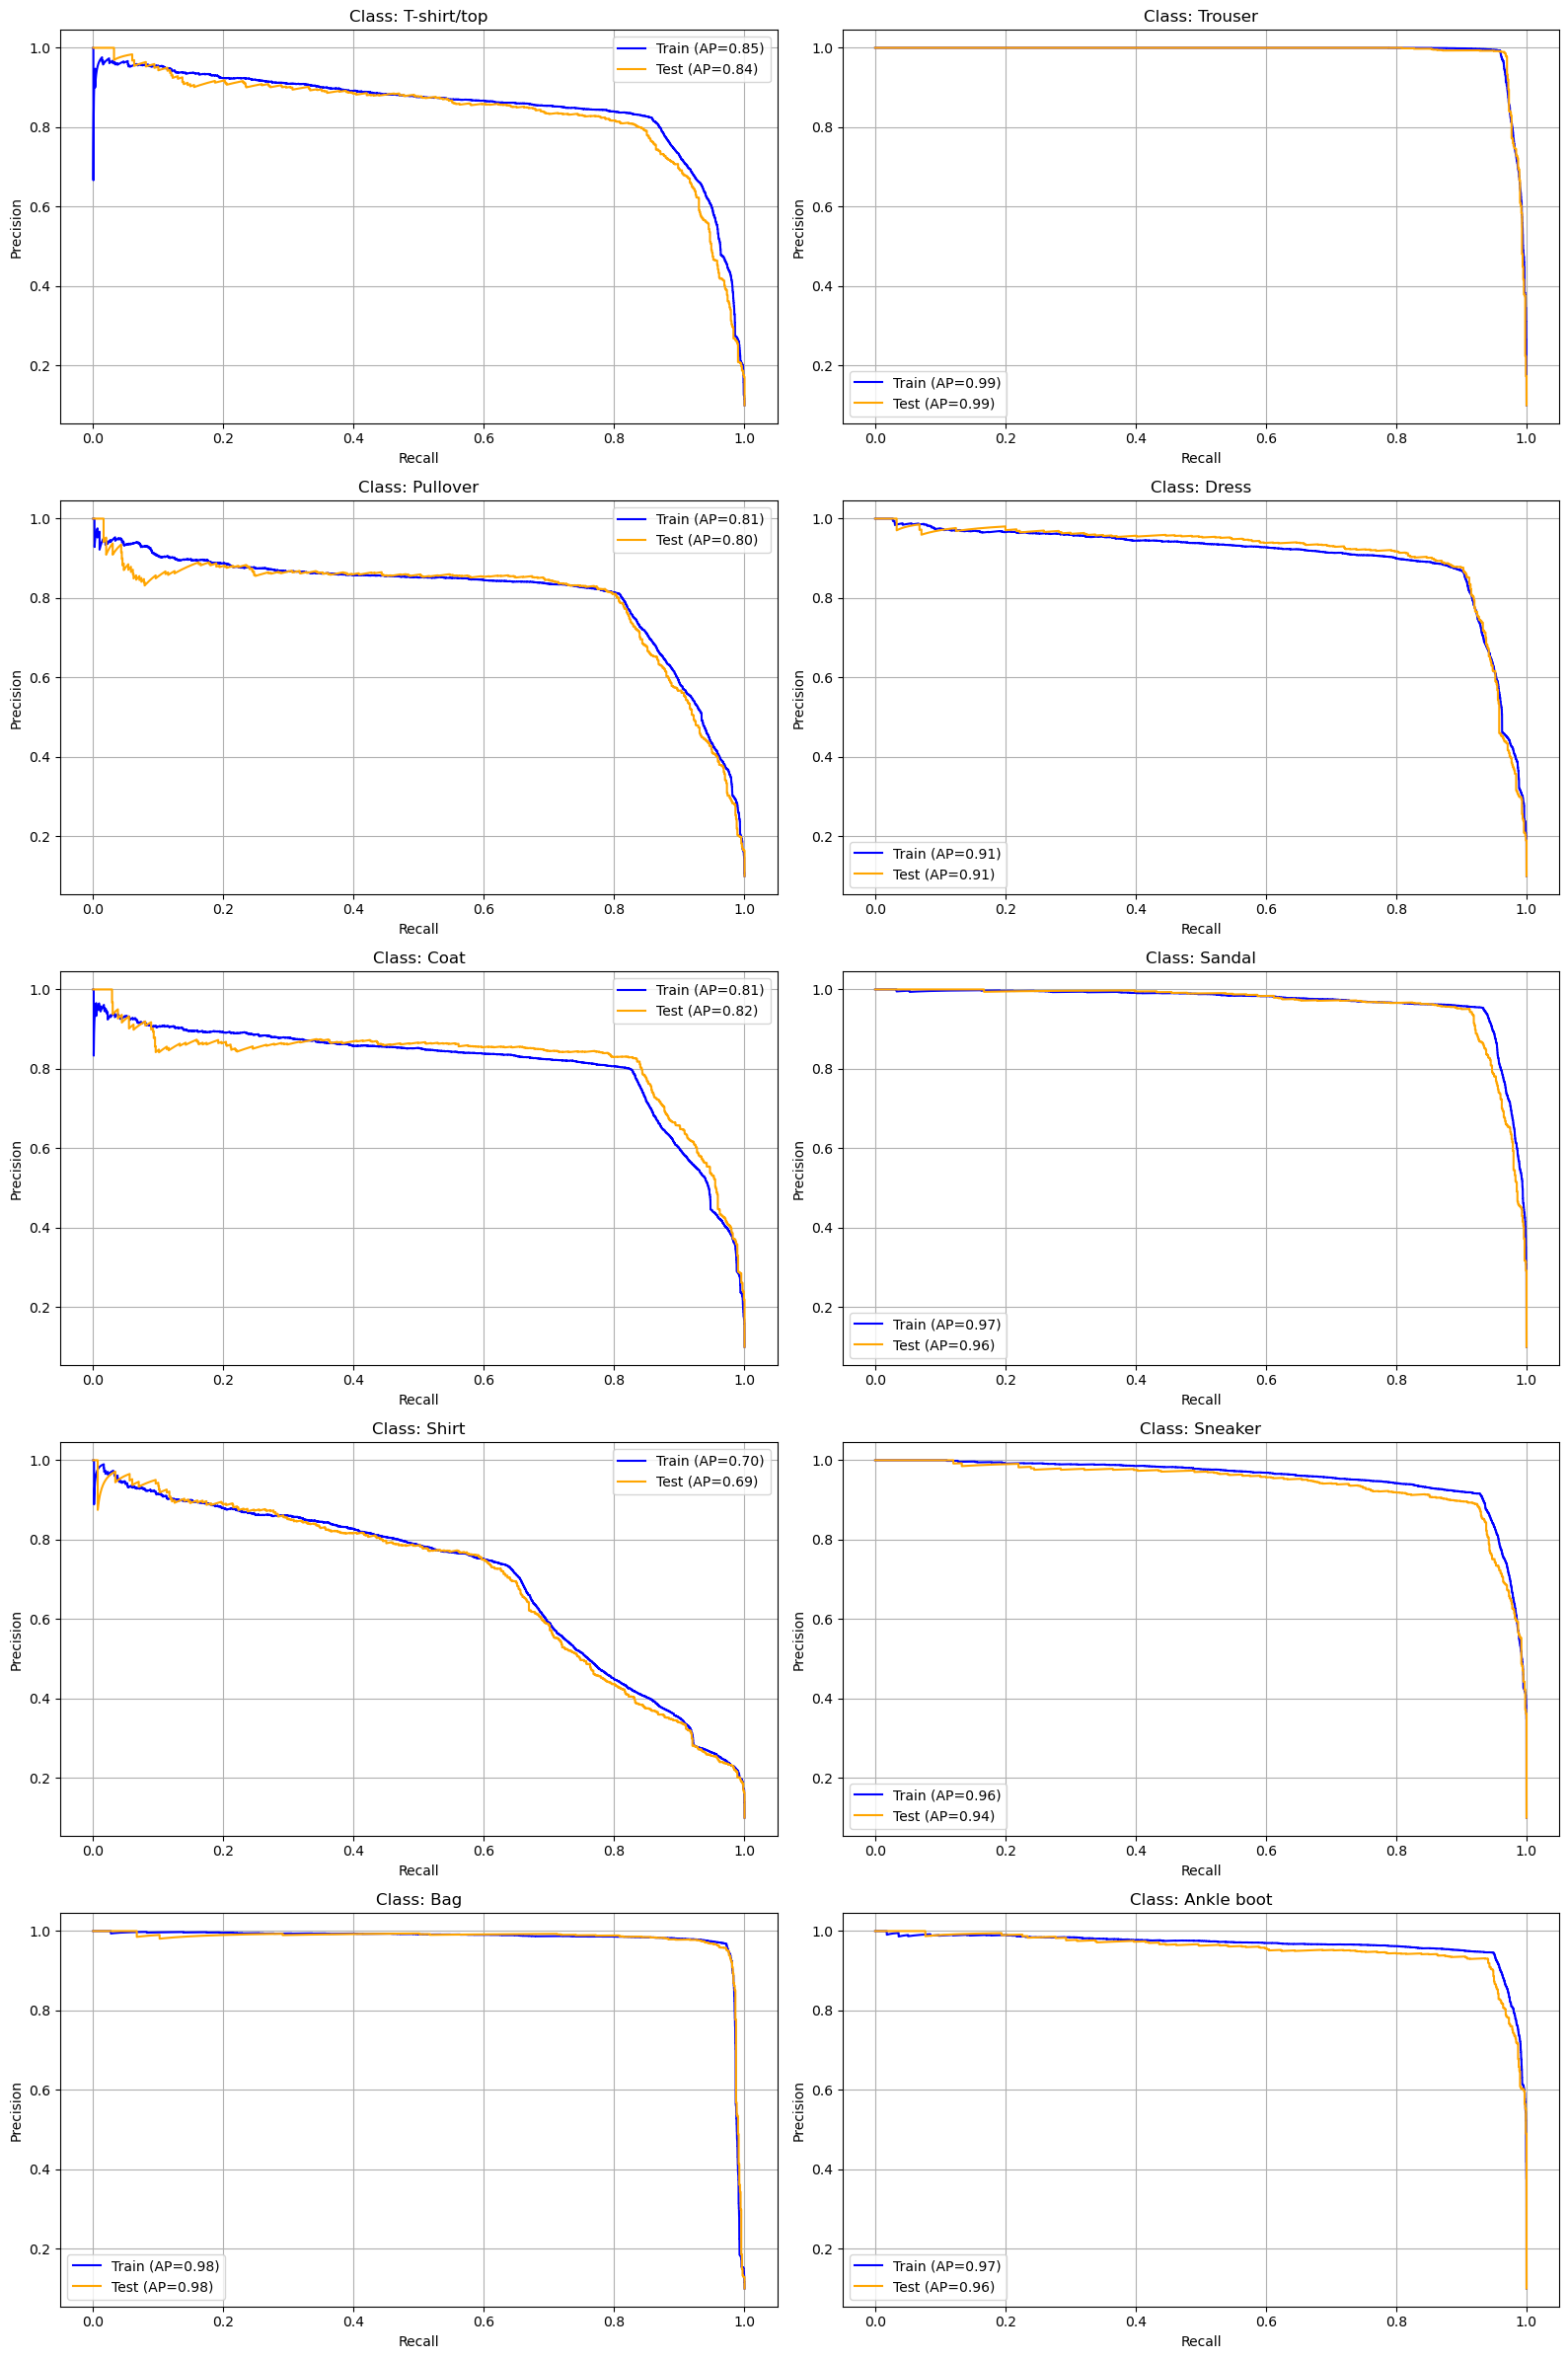

In [ ]:
# Get the probability estimates for the SVM model (required for precision-recall curve)
y_train_prob = svm_clf.decision_function(x_train_pca)
y_test_prob = svm_clf.decision_function(x_test_pca)

# Initialize subplots
fig, axes = plt.subplots(5,2, figsize=(16, 24))
axes = axes.ravel()
for i in range(10):
    precision_train, recall_train, _ = precision_recall_curve(y_train == i, y_train_prob[:, i])
    precision_test, recall_test, _ = precision_recall_curve(y_test == i, y_test_prob[:, i])

    ap_train = average_precision_score(y_train == i, y_train_prob[:, i])
    ap_test = average_precision_score(y_test == i, y_test_prob[:, i])

    axes[i].plot(recall_train, precision_train, label=f'Train (AP={ap_train:.2f})', color='blue')
    axes[i].plot(recall_test, precision_test, label=f'Test (AP={ap_test:.2f})', color='orange')
    axes[i].set_title(f'Class: {class_names[i]}')
    axes[i].set_xlabel('Recall')
    axes[i].set_ylabel('Precision')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.savefig(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\images_from_project\PR_Curve_SVM.png")
plt.legend(loc="best")
plt.show()


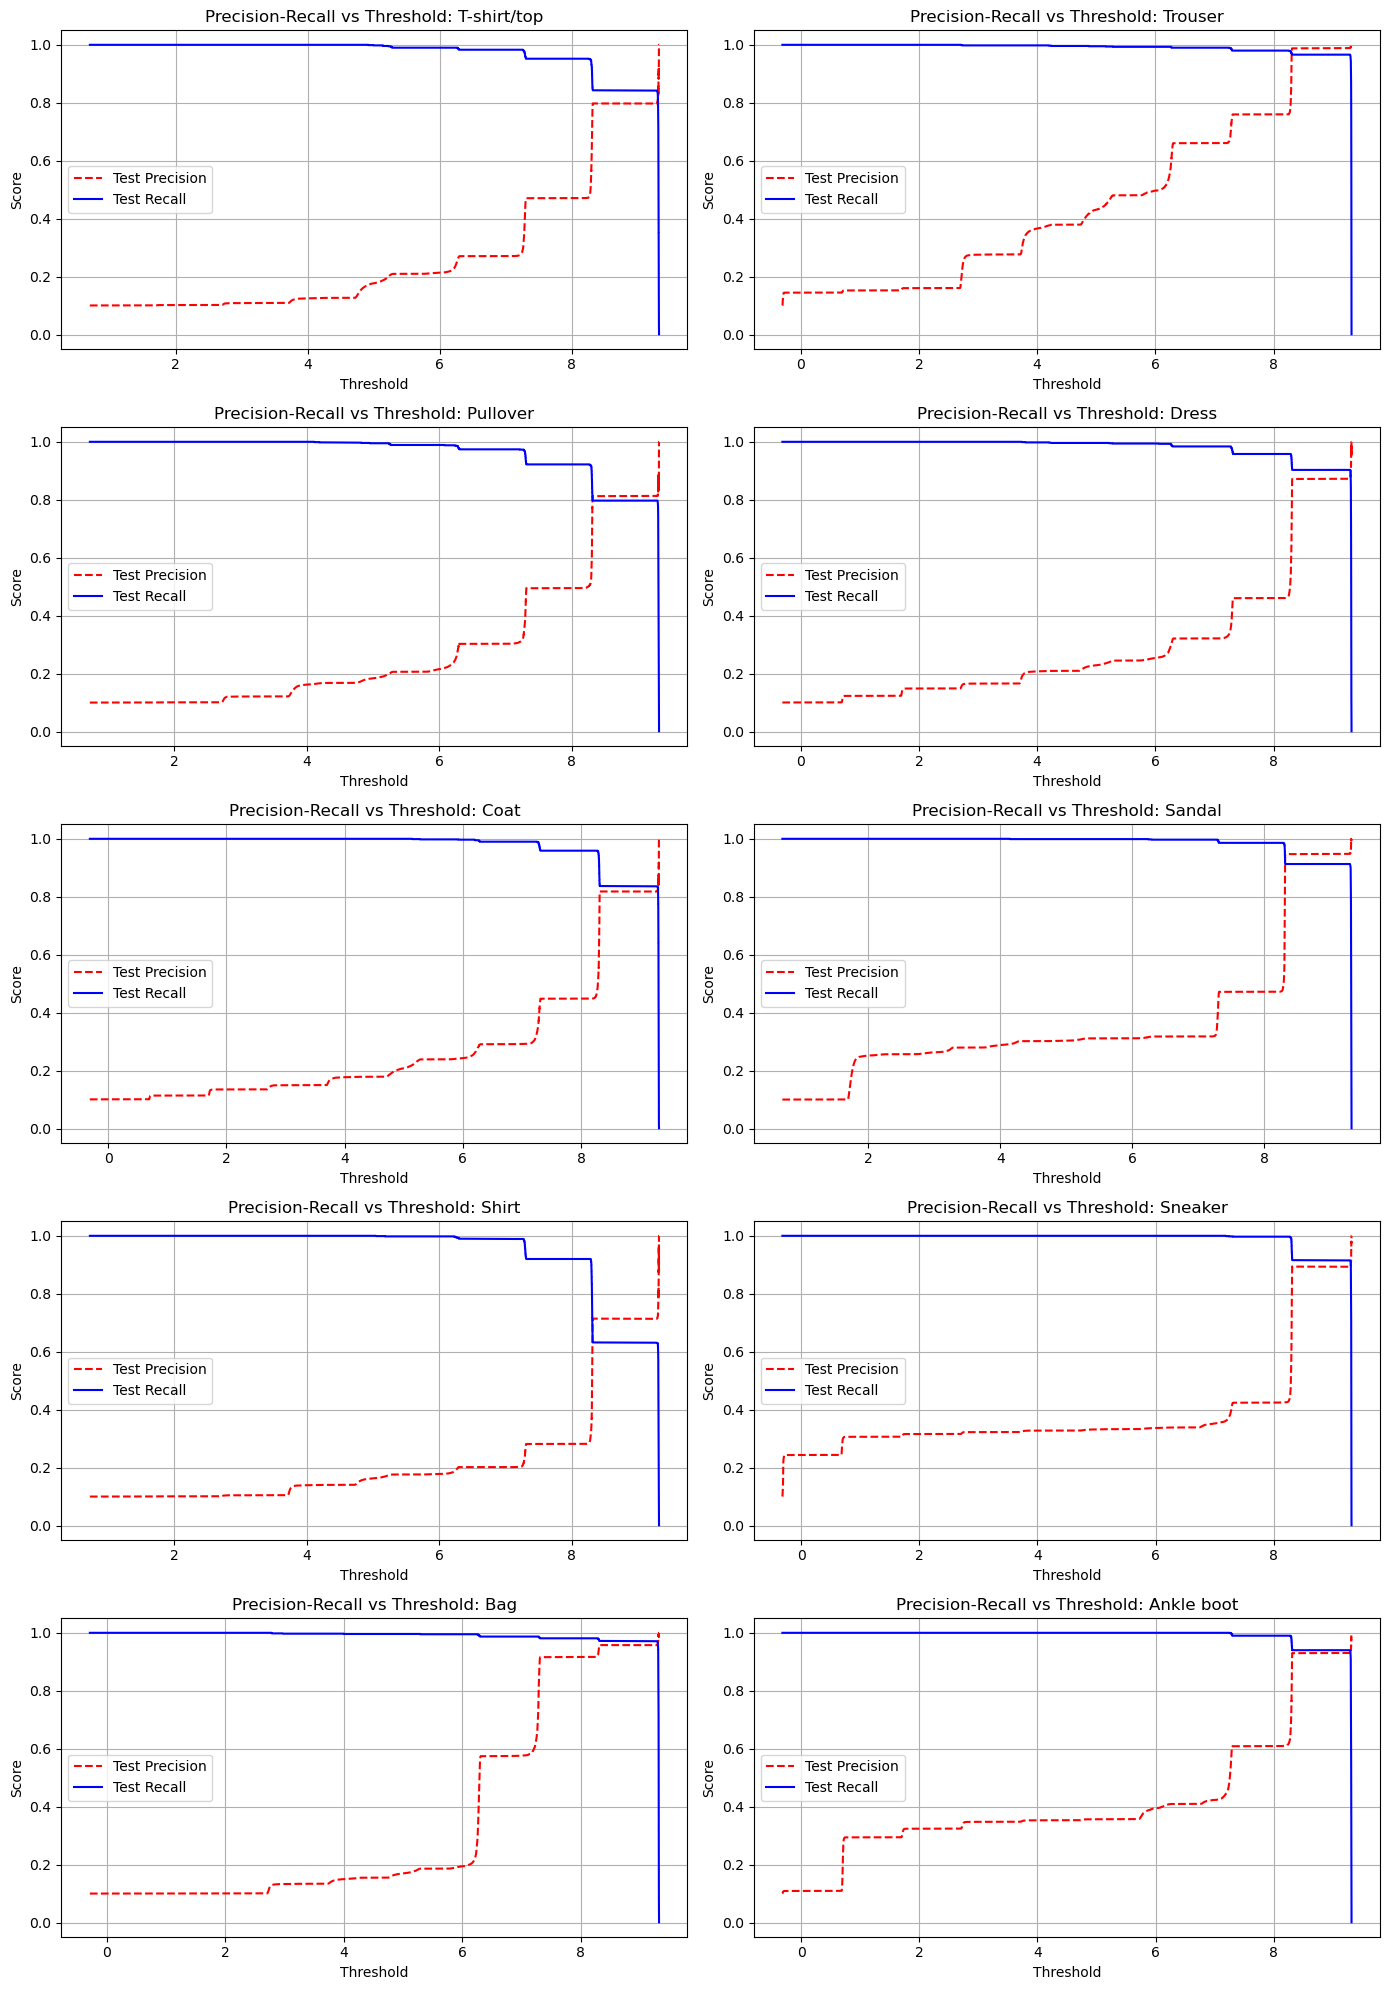

In [ ]:
# Get probabilities for train and test sets
y_test_probs = svm_clf.decision_function(x_test_pca)
# Plot precision and recall vs threshold for each class
plt.figure(figsize=(14, 20))
for idx, class_name in enumerate(class_names):
    plt.subplot(5, 2, idx + 1)
    precision_test, recall_test, thresholds_test = precision_recall_curve(
        (y_test.values.ravel() == idx).astype(int), y_test_probs[:, idx])
    plt.plot(thresholds_test, precision_test[:-1], 'r--', label='Test Precision')
    plt.plot(thresholds_test, recall_test[:-1], 'b-', label='Test Recall')

    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title(f"Precision-Recall vs Threshold: {class_name}")
    plt.legend()
    plt.grid()
plt.tight_layout()
plt.savefig(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\images_from_project\PR_vs_threse_SVM.png")
plt.show()

#### The function will take model, x train, x test, y train, y test and then it will fit the model, then make predictions on the trained model, it will then print roc-auc score of train and test, then plot the roc, auc curve, print confusion matrix for train and test, then print classification report for train and test, then plot the feature importances if the model has feature importances, and finally it will return the following scores as a list: recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ####

In [ ]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    start_time=time.time()
    model.fit(x_train, y_train)
    end_time=time.time()
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)

    sns.heatmap(cm_train, annot=True, xticklabels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt', 'Sneaker','Bag','Ankle boot'],
                yticklabels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker',  'Bag','Ankle boot'],
                cmap="Purples", fmt='.4g')
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion matrix of training set")
    plt.subplot(1, 2, 2)

    sns.heatmap(cm_test, annot=True, xticklabels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt','Sneaker','Bag','Ankle boot'],
                yticklabels=['T-shirt/top','Trouser','Pullover', 'Dress', 'Coat', 'Sandal','Shirt','Sneaker','Bag','Ankle boot'],
                cmap="Purples", fmt='.4g')
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion matrix of test set")
    plt.savefig(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\images_from_project\softmax.png")  # Save the testing plot as an image file

    plt.show()
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print(f"Time taken to train the model : {end_time-start_time}")
    print("\nTraining set Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTesting set Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())

In [ ]:
def evaluate_model_with_pr_curve(model, x_train, x_test, y_train, y_test):
    start_time = time.time()
    model.fit(x_train, y_train)
    end_time = time.time()

    # Predict probabilities for PR curve calculation
    y_score_train = model.predict_proba(x_train)
    y_score_test = model.predict_proba(x_test)
    print(f"Time taken to train the model: {end_time - start_time:.2f} seconds")

    # Binarize the output for multiclass PR curve
    y_train_binarized = label_binarize(y_train, classes=list(range(len(model.classes_))))
    y_test_binarized = label_binarize(y_test, classes=list(range(len(model.classes_))))

    n_classes = y_test_binarized.shape[1]

    # Plot Precision-Recall curve for each class
    plt.figure(figsize=(16, 24))
    for i in range(n_classes):
        plt.subplot(5, 2, i + 1)

        # Train set PR curve
        precision_train, recall_train, _ = precision_recall_curve(y_train_binarized[:, i], y_score_train[:, i])
        avg_precision_train = average_precision_score(y_train_binarized[:, i], y_score_train[:, i])
        plt.plot(recall_train, precision_train, label=f'Train (AP={avg_precision_train:.2f})', color='blue')

        # Test set PR curve
        precision_test, recall_test, _ = precision_recall_curve(y_test_binarized[:, i], y_score_test[:, i])
        avg_precision_test = average_precision_score(y_test_binarized[:, i], y_score_test[:, i])
        plt.plot(recall_test, precision_test, label=f'Test (AP={avg_precision_test:.2f})', color='orange')

        # Plot formatting
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.title(f"Precision vs Recall Curve for {class_names[i]}")
        plt.grid(True)
        plt.legend()

    plt.tight_layout()
    plt.savefig(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\images_from_project\softmaxpvsr.png")
    plt.show()

**Selecting model Logistic Regression**

In [ ]:
lr_model = LogisticRegression(multi_class='multinomial', max_iter=1000)

**Evaluating Model Performance**

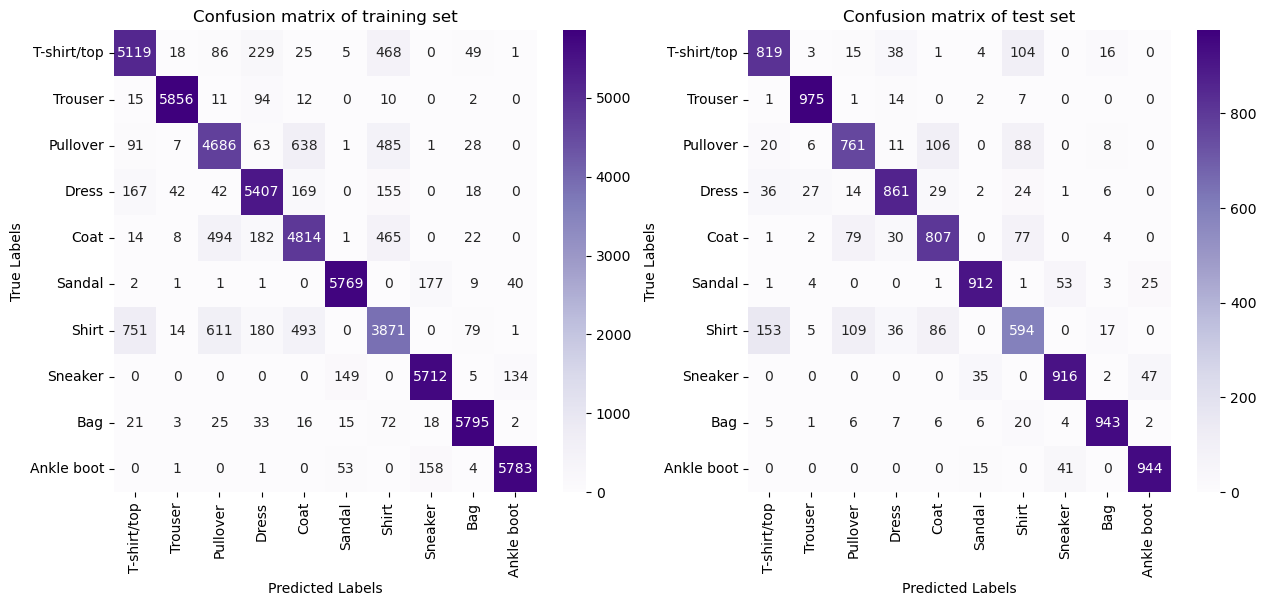

Time taken to train the model : 73.93851518630981

Training set Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.828317 | 0.853167 |   0.840558 |  6000      |
| 1            |    0.984202 | 0.976    |   0.980084 |  6000      |
| 2            |    0.78677  | 0.781    |   0.783874 |  6000      |
| 3            |    0.873506 | 0.901167 |   0.887121 |  6000      |
| 4            |    0.780606 | 0.802333 |   0.791321 |  6000      |
| 5            |    0.962623 | 0.9615   |   0.962061 |  6000      |
| 6            |    0.700507 | 0.645167 |   0.671699 |  6000      |
| 7            |    0.941642 | 0.952    |   0.946793 |  6000      |
| 8            |    0.964066 | 0.965833 |   0.964949 |  6000      |
| 9            |    0.970139 | 0.963833 |   0.966976 |  6000      |
| accuracy     |    0.8802   | 0.8802   |   0.8802   |     0.8802 |
| macro avg    |    0.879238 

In [ ]:
lr_score = evaluate_model(lr_model, x_train_MM_scaled, x_test_MM_scaled, y_train.values.ravel(), y_test.values.ravel())

Time taken to train the model: 72.64 seconds


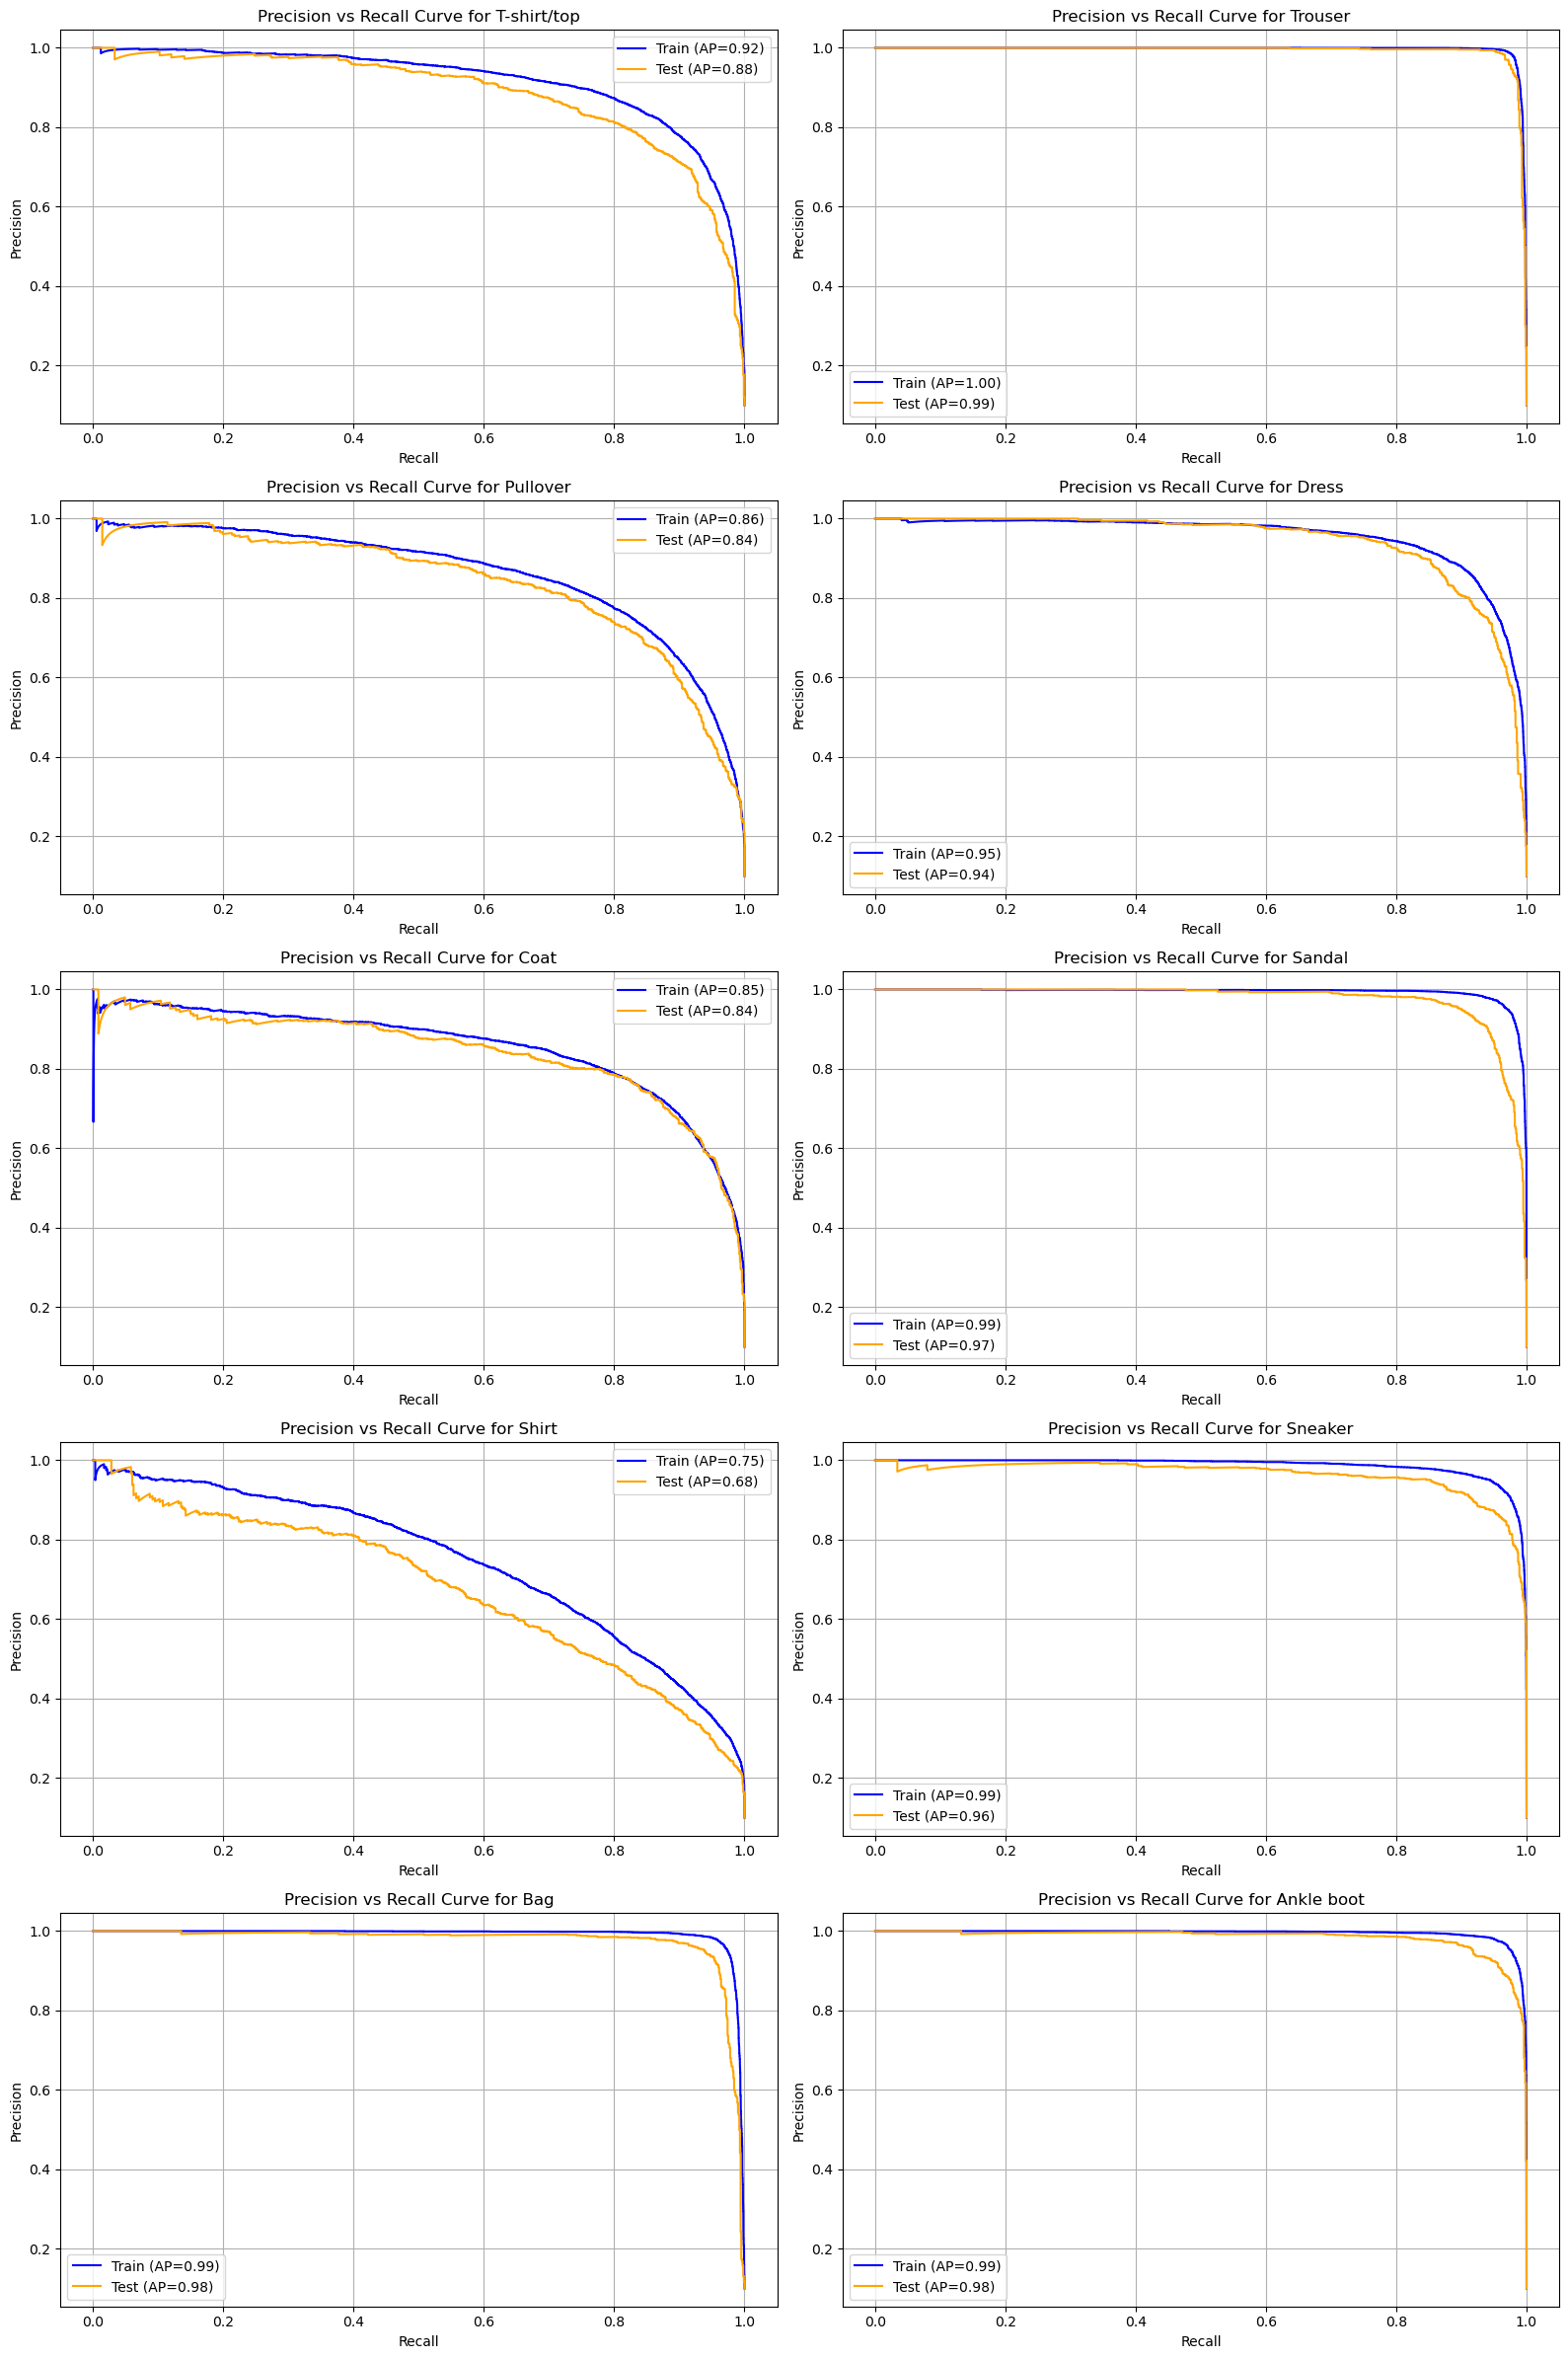

In [ ]:
evaluate_model_with_pr_curve(lr_model, x_train_MM_scaled, x_test_MM_scaled, y_train.values.ravel(), y_test.values.ravel())

#### Confusion Matrix: Identifying T-shirt/top vs. All Other Classes, Precision-Recall Curve, and Precision-Recall vs. Threshold Curve, ROC curve ####

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

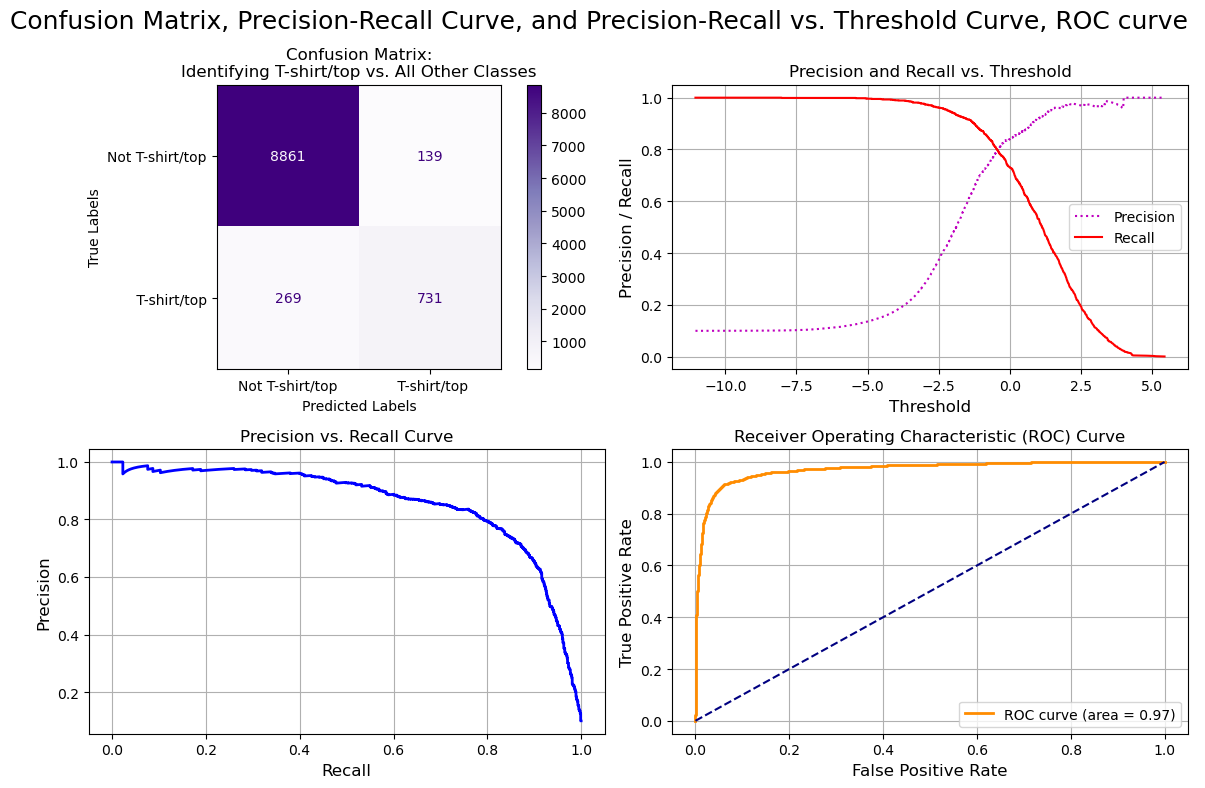

Precision: 0.8402
Recall: 0.7310
F1 Score: 0.7818
Time taken for the process: 5.8607 seconds


In [ ]:
# Binary targets for the "T-shirt/top" class
y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)

# Timing the model training and prediction
start0 = time.time()
sgd_clf = SGDClassifier(random_state=42, max_iter=10000)
sgd_clf.fit(x_train_MM_scaled, y_train_0.values.ravel())
y_pred_0 = sgd_clf.predict(x_test_MM_scaled)
end0 = time.time()

# Compute decision scores for the precision-recall curve
y_scores0 = sgd_clf.decision_function(x_test_MM_scaled)
precision0, recall0, thresholds0 = precision_recall_curve(y_test_0, y_scores0)

# Calculate scalar precision, recall, and F1 score
precision_val0 = precision_score(y_test_0, y_pred_0)
recall_val0 = recall_score(y_test_0, y_pred_0)
f1_val0 = f1_score(y_test_0, y_pred_0)
# Generate ROC curve values
fpr0, tpr0, thresholds_roc0 = roc_curve(y_test_0, y_scores0)
roc_auc0 = auc(fpr0, tpr0)

# Generate the confusion matrix
conf_matrix0 = confusion_matrix(y_test_0, y_pred_0)

# Plot the confusion matrix and precision-recall curve
plt.figure(figsize=(12, 8))

# Plot the confusion matrix
plt.subplot(2, 2, 1)
disp0 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix0, display_labels=["Not T-shirt/top", " T-shirt/top"])
disp0.plot(cmap=plt.cm.Purples, ax=plt.gca())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.title("Confusion Matrix:\nIdentifying T-shirt/top vs. All Other Classes")
plt.suptitle("Confusion Matrix, Precision-Recall Curve, and Precision-Recall vs. Threshold Curve, ROC curve ", fontsize=18)

# Plot the precision-recall curve
plt.subplot(2, 2, 2)
plt.plot(thresholds0, precision0[:-1], label="Precision", color="m", linestyle=":")
plt.plot(thresholds0, recall0[:-1], label="Recall", color="red", linestyle="-")
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Precision / Recall", fontsize=12)
plt.title("Precision and Recall vs. Threshold")
plt.legend(loc="best")
plt.grid(True)

# Plot precision and recall vs. threshold curve
plt.subplot(2, 2, 3)
plt.plot(recall0, precision0, color="b", linewidth=2)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision vs. Recall Curve")
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(fpr0, tpr0, color="darkorange", linewidth=2, label=f"ROC curve (area = {roc_auc0:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\images_from_project\binaryclass0.png")

plt.show()
# Print the matrics and time taken
print(f"Precision: {precision_val0:.4f}")
print(f"Recall: {recall_val0:.4f}")
print(f"F1 Score: {f1_val0:.4f}")
print(f"Time taken for the process: {end0 - start0:.4f} seconds")

#### Confusion Matrix: Identifying Trouser vs. All Other Classes, Precision-Recall Curve, and Precision-Recall vs. Threshold Curve, ROC curve ####

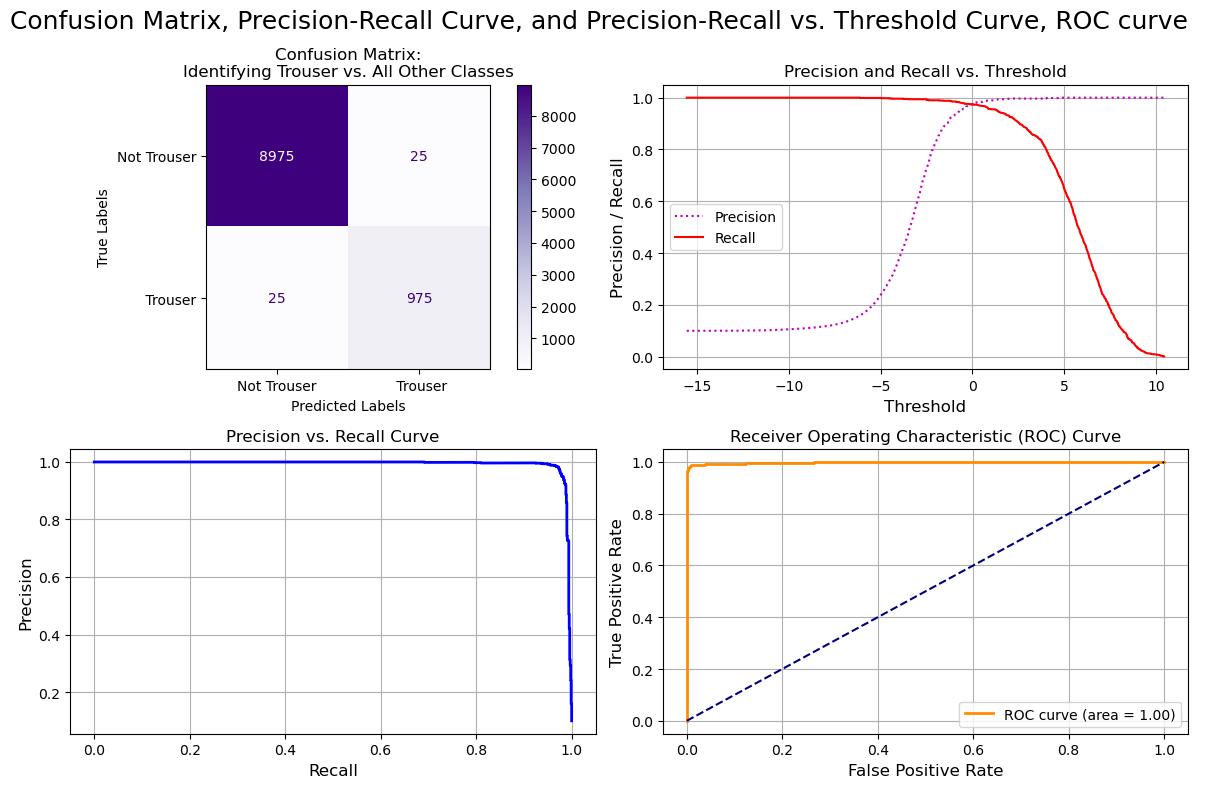

Precision: 0.9750
Recall: 0.9750
F1 Score: 0.9750
Time taken for the process: 1.9799 seconds


In [ ]:
# Binary targets for the "Trousers" class
y_train_1 = (y_train == 1)
y_test_1 = (y_test == 1)

# Timing the model training and prediction
start1 = time.time()
sgd_clf = SGDClassifier(random_state=42, max_iter=10000)
sgd_clf.fit(x_train_MM_scaled, y_train_1.values.ravel())
y_pred_1 = sgd_clf.predict(x_test_MM_scaled)
end1 = time.time()

# Compute decision scores for the precision-recall curve
y_scores1 = sgd_clf.decision_function(x_test_MM_scaled)
precision1, recall1, thresholds1 = precision_recall_curve(y_test_1, y_scores1)

# Calculate scalar precision, recall, and F1 score
precision_val1 = precision_score(y_test_1, y_pred_1)
recall_val1 = recall_score(y_test_1, y_pred_1)
f1_val1 = f1_score(y_test_1, y_pred_1)
# Generate ROC curve values
fpr1, tpr1, thresholds_roc1 = roc_curve(y_test_1, y_scores1)
roc_auc1 = auc(fpr1, tpr1)

# Generate the confusion matrix
conf_matrix1 = confusion_matrix(y_test_1, y_pred_1)

# Plot the confusion matrix and precision-recall curve
plt.figure(figsize=(12, 8))

# Plot the confusion matrix
plt.subplot(2, 2, 1)
disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix1, display_labels=["Not Trouser", " Trouser"])
disp1.plot(cmap=plt.cm.Purples, ax=plt.gca())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix:\nIdentifying Trouser vs. All Other Classes")

# Plot the precision-recall curve
plt.subplot(2, 2, 2)
plt.plot(thresholds1, precision1[:-1], label="Precision", color="m", linestyle=":")
plt.plot(thresholds1, recall1[:-1], label="Recall", color="red", linestyle="-")
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Precision / Recall", fontsize=12)
plt.title("Precision and Recall vs. Threshold")
plt.legend(loc="best")
plt.grid(True)

# Plot precision and recall vs. threshold curve
plt.subplot(2, 2, 3)
plt.plot(recall1, precision1, color="b", linewidth=2)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision vs. Recall Curve")
plt.grid(True)
plt.suptitle("Confusion Matrix, Precision-Recall Curve, and Precision-Recall vs. Threshold Curve, ROC curve ", fontsize=18)

plt.subplot(2,2,4)
plt.plot(fpr1, tpr1, color="darkorange", linewidth=2, label=f"ROC curve (area = {roc_auc1:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\images_from_project\binaryclass1.png")

plt.show()

# Print the matrics and time taken
print(f"Precision: {precision_val1:.4f}")
print(f"Recall: {recall_val1:.4f}")
print(f"F1 Score: {f1_val1:.4f}")
print(f"Time taken for the process: {end1 - start1:.4f} seconds")

#### Confusion Matrix: Identifying Pullover vs. All Other Classes, Precision-Recall Curve, and Precision-Recall vs. Threshold Curve, ROC curve ####

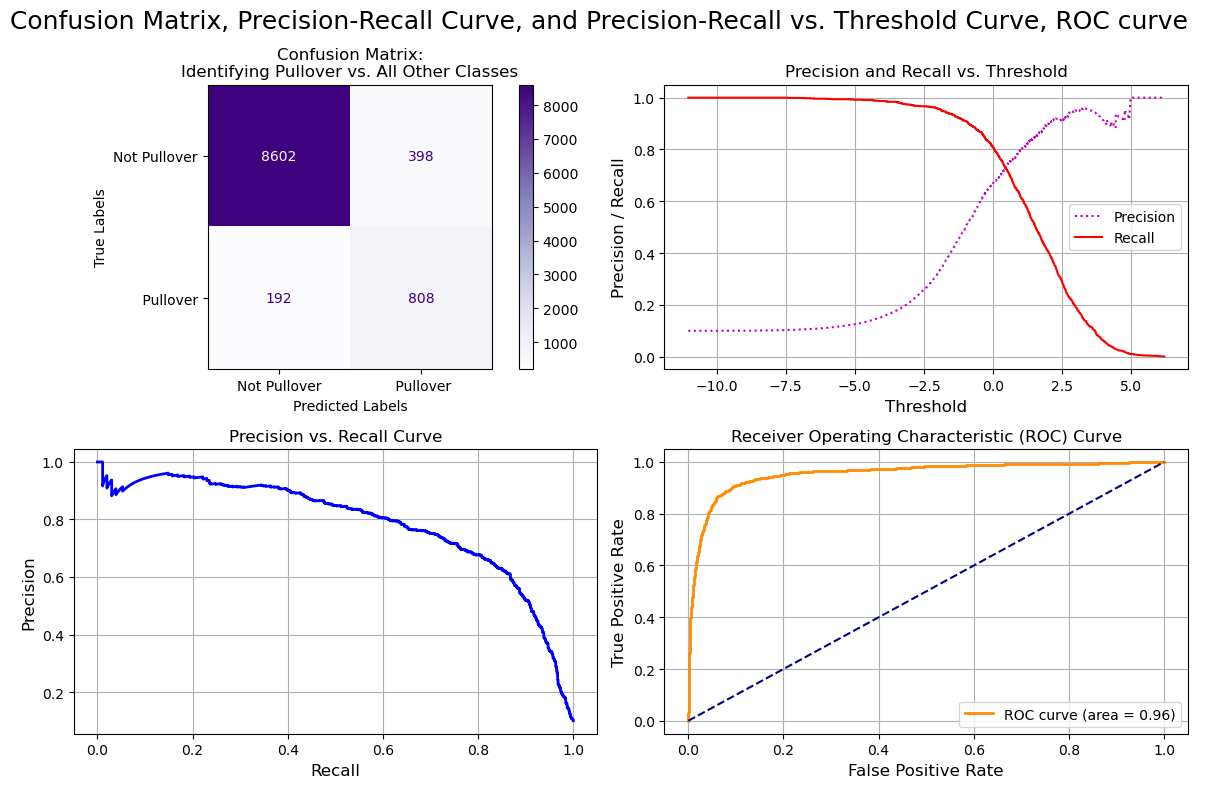

Precision: 0.6700
Recall: 0.8080
F1 Score: 0.7325
Time taken for the process: 5.4852 seconds


In [ ]:
# Binary targets for the "Pullover" class
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

# Timing the model training and prediction
start2 = time.time()
sgd_clf = SGDClassifier(random_state=42, max_iter=10000)
sgd_clf.fit(x_train_MM_scaled, y_train_2.values.ravel())
y_pred_2 = sgd_clf.predict(x_test_MM_scaled)
end2 = time.time()

# Compute decision scores for the precision-recall curve
y_scores2 = sgd_clf.decision_function(x_test_MM_scaled)
precision2, recall2, thresholds2 = precision_recall_curve(y_test_2, y_scores2)

# Calculate scalar precision, recall, and F1 score
precision_val2 = precision_score(y_test_2, y_pred_2)
recall_val2 = recall_score(y_test_2, y_pred_2)
f1_val2 = f1_score(y_test_2, y_pred_2)
# Generate ROC curve values
fpr2, tpr2, thresholds_roc2 = roc_curve(y_test_2, y_scores2)
roc_auc2 = auc(fpr2, tpr2)

# Generate the confusion matrix
conf_matrix2 = confusion_matrix(y_test_2, y_pred_2)

# Plot the confusion matrix and precision-recall curve
plt.figure(figsize=(12, 8))

# Plot the confusion matrix
plt.subplot(2, 2, 1)
disp2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix2, display_labels=["Not Pullover", " Pullover"])
disp2.plot(cmap=plt.cm.Purples, ax=plt.gca())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix:\nIdentifying Pullover vs. All Other Classes")

# Plot the precision-recall curve
plt.subplot(2, 2, 2)
plt.plot(thresholds2, precision2[:-1], label="Precision", color="m", linestyle=":")
plt.plot(thresholds2, recall2[:-1], label="Recall", color="red", linestyle="-")
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Precision / Recall", fontsize=12)
plt.title("Precision and Recall vs. Threshold")
plt.legend(loc="best")
plt.grid(True)

# Plot precision and recall vs. threshold curve
plt.subplot(2, 2, 3)
plt.plot(recall2, precision2, color="b", linewidth=2)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision vs. Recall Curve")
plt.grid(True)
plt.suptitle("Confusion Matrix, Precision-Recall Curve, and Precision-Recall vs. Threshold Curve, ROC curve ", fontsize=18)

plt.subplot(2,2,4)
plt.plot(fpr2, tpr2, color="darkorange", linewidth=2, label=f"ROC curve (area = {roc_auc2:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\images_from_project\binaryclass2.png")

plt.show()

# Print the matrics and time taken
print(f"Precision: {precision_val2:.4f}")
print(f"Recall: {recall_val2:.4f}")
print(f"F1 Score: {f1_val2:.4f}")
print(f"Time taken for the process: {end2 - start2:.4f} seconds")

#### Confusion Matrix: Identifying Dress vs. All Other Classes, Precision-Recall Curve, and Precision-Recall vs. Threshold Curve, ROC curve ####

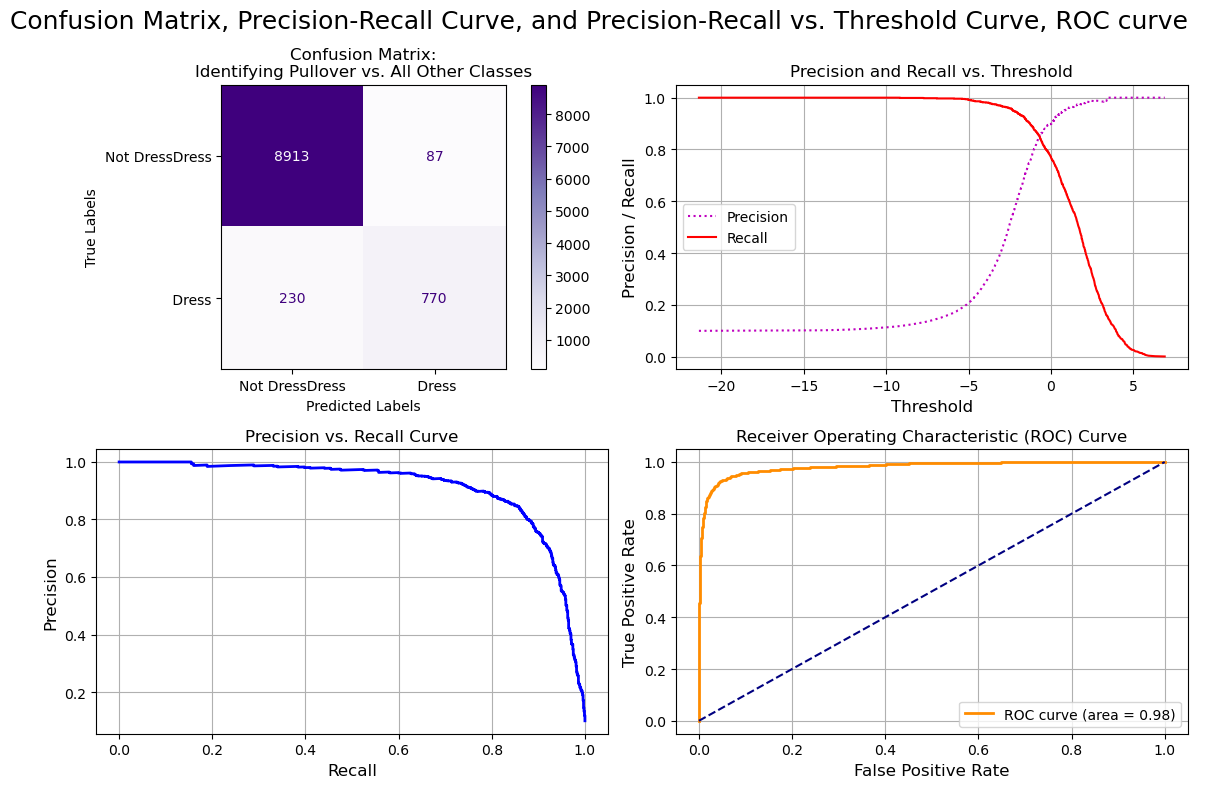

Precision: 0.8985
Recall: 0.7700
F1 Score: 0.8293
Time taken for the process: 3.2190 seconds


In [ ]:
# Binary targets for the "Dress" class
y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)

# Timing the model training and prediction
start3 = time.time()
sgd_clf = SGDClassifier(random_state=42, max_iter=10000)
sgd_clf.fit(x_train_MM_scaled, y_train_3.values.ravel())
y_pred_3 = sgd_clf.predict(x_test_MM_scaled)
end3 = time.time()

# Compute decision scores for the precision-recall curve
y_scores3 = sgd_clf.decision_function(x_test_MM_scaled)
precision3, recall3, thresholds3 = precision_recall_curve(y_test_3, y_scores3)

# Calculate scalar precision, recall, and F1 score
precision_val3 = precision_score(y_test_3, y_pred_3)
recall_val3 = recall_score(y_test_3, y_pred_3)
f1_val3 = f1_score(y_test_3, y_pred_3)
# Generate ROC curve values
fpr3, tpr3, thresholds_roc3 = roc_curve(y_test_3, y_scores3)
roc_auc3 = auc(fpr3, tpr3)

# Generate the confusion matrix
conf_matrix3 = confusion_matrix(y_test_3, y_pred_3)

# Plot the confusion matrix and precision-recall curve
plt.figure(figsize=(12, 8))

# Plot the confusion matrix
plt.subplot(2, 2, 1)
disp3 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix3, display_labels=["Not DressDress", " Dress"])

disp3.plot(cmap=plt.cm.Purples, ax=plt.gca())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix:\nIdentifying Pullover vs. All Other Classes")

# Plot the precision-recall curve
plt.subplot(2, 2, 2)
plt.plot(thresholds3, precision3[:-1], label="Precision", color="m", linestyle=":")
plt.plot(thresholds3, recall3[:-1], label="Recall", color="red", linestyle="-")
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Precision / Recall", fontsize=12)
plt.title("Precision and Recall vs. Threshold")
plt.legend(loc="best")
plt.grid(True)

# Plot precision and recall vs. threshold curve
plt.subplot(2, 2, 3)
plt.plot(recall3, precision3, color="b", linewidth=2)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision vs. Recall Curve")
plt.grid(True)
plt.suptitle("Confusion Matrix, Precision-Recall Curve, and Precision-Recall vs. Threshold Curve, ROC curve ", fontsize=18)

plt.subplot(2,2,4)
plt.plot(fpr3, tpr3, color="darkorange", linewidth=2, label=f"ROC curve (area = {roc_auc3:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\images_from_project\binaryclass3.png")

plt.show()

# Print the matrics and time taken
print(f"Precision: {precision_val3:.4f}")
print(f"Recall: {recall_val3:.4f}")
print(f"F1 Score: {f1_val3:.4f}")
print(f"Time taken for the process: {end3 - start3:.4f} seconds")

#### Confusion Matrix: Identifying Coat vs. All Other Classes, Precision-Recall Curve, and Precision-Recall vs. Threshold Curve, ROC curve ####

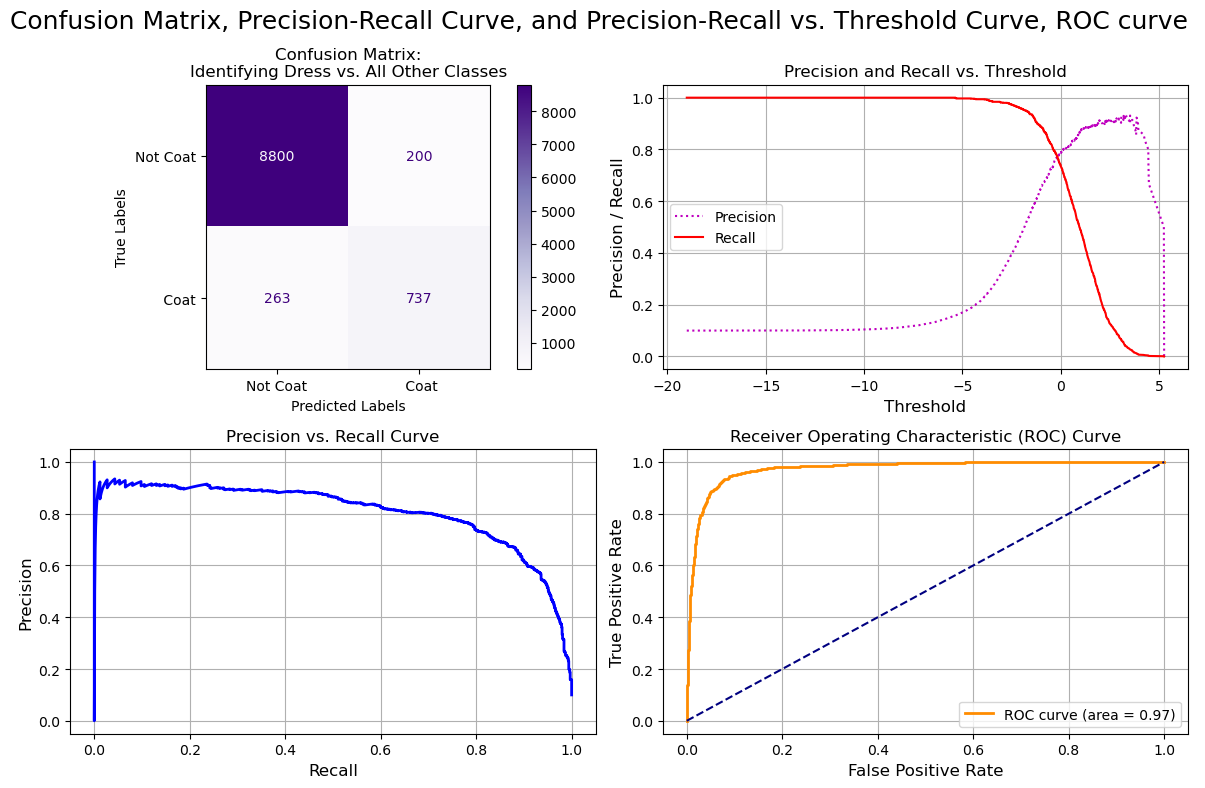

Precision: 0.7866
Recall: 0.7370
F1 Score: 0.7610
Time taken for the process: 4.8217 seconds


In [ ]:
# Binary targets for the "Coat" class
y_train_4 = (y_train == 4)
y_test_4 = (y_test == 4)

# Timing the model training and prediction
start4 = time.time()
sgd_clf = SGDClassifier(random_state=42, max_iter=10000)
sgd_clf.fit(x_train_MM_scaled, y_train_4.values.ravel())
y_pred_4 = sgd_clf.predict(x_test_MM_scaled)
end4 = time.time()

# Compute decision scores for the precision-recall curve
y_scores4 = sgd_clf.decision_function(x_test_MM_scaled)
precision4, recall4, thresholds4 = precision_recall_curve(y_test_4, y_scores4)

# Calculate scalar precision, recall, and F1 score
precision_val4 = precision_score(y_test_4, y_pred_4)
recall_val4 = recall_score(y_test_4, y_pred_4)
f1_val4 = f1_score(y_test_4, y_pred_4)
# Generate ROC curve values
fpr4, tpr4, thresholds_roc4 = roc_curve(y_test_4, y_scores4)
roc_auc4 = auc(fpr4, tpr4)

# Generate the confusion matrix
conf_matrix4 = confusion_matrix(y_test_4, y_pred_4)

# Plot the confusion matrix and precision-recall curve
plt.figure(figsize=(12, 8))

# Plot the confusion matrix
plt.subplot(2, 2, 1)
disp4 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix4, display_labels=["Not Coat", " Coat"])
disp4.plot(cmap=plt.cm.Purples, ax=plt.gca())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix:\nIdentifying Dress vs. All Other Classes")

# Plot the precision-recall curve
plt.subplot(2, 2, 2)
plt.plot(thresholds4, precision4[:-1], label="Precision", color="m", linestyle=":")
plt.plot(thresholds4, recall4[:-1], label="Recall", color="red", linestyle="-")
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Precision / Recall", fontsize=12)
plt.title("Precision and Recall vs. Threshold")
plt.legend(loc="best")
plt.grid(True)

# Plot precision and recall vs. threshold curve
plt.subplot(2, 2, 3)
plt.plot(recall4, precision4, color="b", linewidth=2)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision vs. Recall Curve")
plt.grid(True)
plt.suptitle("Confusion Matrix, Precision-Recall Curve, and Precision-Recall vs. Threshold Curve, ROC curve ", fontsize=18)

plt.subplot(2,2,4)
plt.plot(fpr4, tpr4, color="darkorange", linewidth=2, label=f"ROC curve (area = {roc_auc4:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\images_from_project\binaryclass4.png")
plt.show()

# Print the matrics and time taken
print(f"Precision: {precision_val4:.4f}")
print(f"Recall: {recall_val4:.4f}")
print(f"F1 Score: {f1_val4:.4f}")
print(f"Time taken for the process: {end4 - start4:.4f} seconds")

### Confusion Matrix at Threshold = 3 & 4 & 5 ###

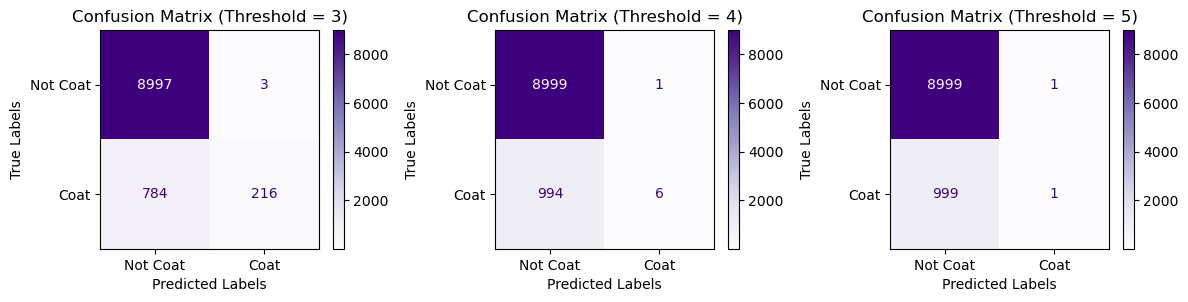

In [ ]:
# Decision scores from the model
y_scores4 = sgd_clf.decision_function(x_test_MM_scaled)

# Predictions for threshold = 3
threshold_3 = 3
y_pred_threshold_3 = (y_scores3 >= threshold_3).astype(int)
conf_matrix_threshold_3 = confusion_matrix(y_test_3, y_pred_threshold_3)

# Predictions for threshold = 4
threshold_4 = 4
y_pred_threshold_4 = (y_scores4 >= threshold_4).astype(int)
conf_matrix_threshold_4 = confusion_matrix(y_test_4, y_pred_threshold_4)

# Predictions for threshold = 5
threshold_5 = 5
y_pred_threshold_5 = (y_scores4 >= threshold_5).astype(int)
conf_matrix_threshold_5 = confusion_matrix(y_test_4, y_pred_threshold_5)

# Plot the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Confusion matrix for threshold 4
disp_3 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_threshold_3, display_labels=["Not Coat", "Coat"])
disp_3.plot(cmap=plt.cm.Purples, ax=axes[0])
axes[0].set_title("Confusion Matrix (Threshold = 3)")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")

# Confusion matrix for threshold 5
disp_4 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_threshold_4, display_labels=["Not Coat", "Coat"])
disp_4.plot(cmap=plt.cm.Purples, ax=axes[1])
axes[1].set_title("Confusion Matrix (Threshold = 4)")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")

# Confusion matrix for threshold 5
disp_5 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_threshold_5, display_labels=["Not Coat", "Coat"])
disp_5.plot(cmap=plt.cm.Purples, ax=axes[2])
axes[2].set_title("Confusion Matrix (Threshold = 5)")
axes[2].set_xlabel("Predicted Labels")
axes[2].set_ylabel("True Labels")

plt.tight_layout()
plt.savefig(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\images_from_project\binaryclass4Threshold=4&5.png")

plt.show()


#### Confusion Matrix: Identifying Sandal vs. All Other Classes, Precision-Recall Curve, and Precision-Recall vs. Threshold Curve, ROC curve ####

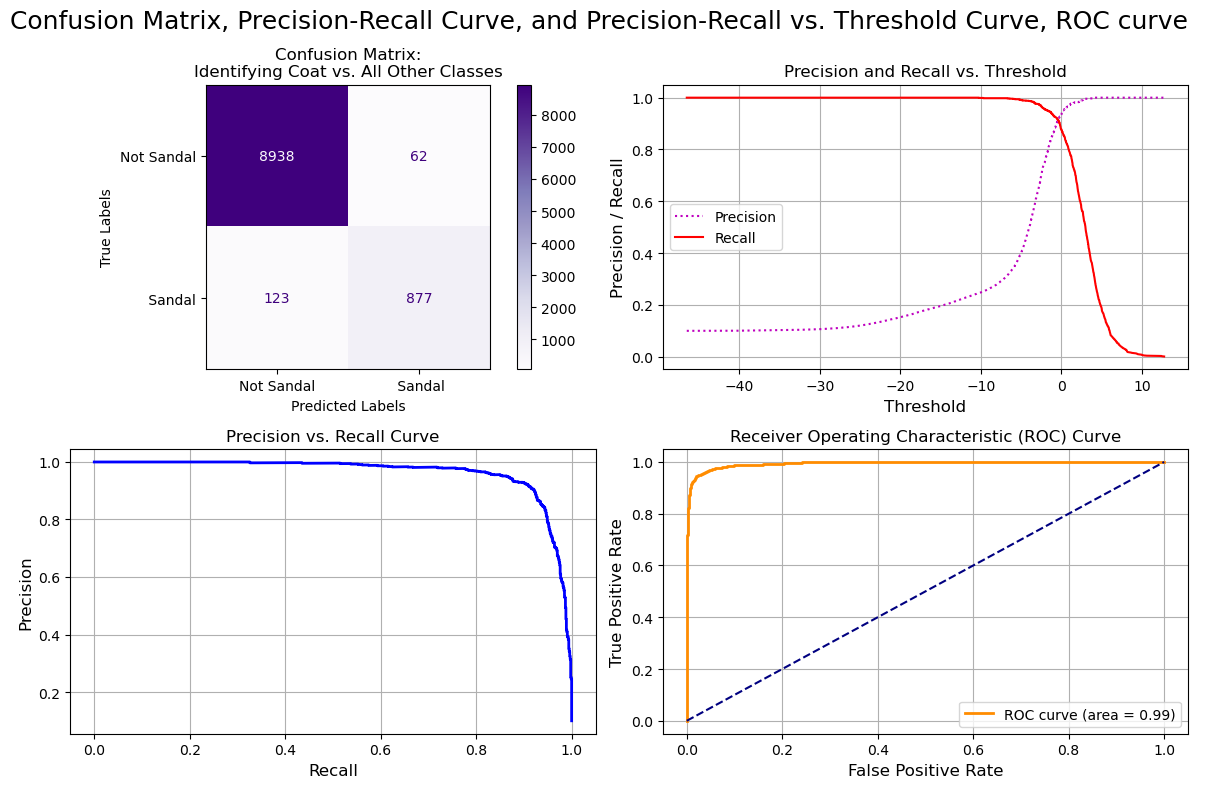

Precision: 0.9340
Recall: 0.8770
F1 Score: 0.9046
Time taken for the process: 2.1194 seconds


In [ ]:
# Binary targets for the "Sandal" class
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

# Timing the model training and prediction
start5 = time.time()
sgd_clf = SGDClassifier(random_state=42, max_iter=10000)
sgd_clf.fit(x_train_MM_scaled, y_train_5.values.ravel())
y_pred_5 = sgd_clf.predict(x_test_MM_scaled)
end5 = time.time()

# Compute decision scores for the precision-recall curve
y_scores5 = sgd_clf.decision_function(x_test_MM_scaled)
precision5, recall5, thresholds5 = precision_recall_curve(y_test_5, y_scores5)

# Calculate scalar precision, recall, and F1 score
precision_val5 = precision_score(y_test_5, y_pred_5)
recall_val5 = recall_score(y_test_5, y_pred_5)
f1_val5 = f1_score(y_test_5, y_pred_5)
# Generate ROC curve values
fpr5, tpr5, thresholds_roc5 = roc_curve(y_test_5, y_scores5)
roc_auc5 = auc(fpr5, tpr5)

# Generate the confusion matrix
conf_matrix5 = confusion_matrix(y_test_5, y_pred_5)

# Plot the confusion matrix and precision-recall curve
plt.figure(figsize=(12, 8))

# Plot the confusion matrix
plt.subplot(2, 2, 1)
disp5 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix5, display_labels=["Not Sandal", " Sandal"])
disp5.plot(cmap=plt.cm.Purples, ax=plt.gca())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix:\nIdentifying Coat vs. All Other Classes")

# Plot the precision-recall curve
plt.subplot(2, 2, 2)
plt.plot(thresholds5, precision5[:-1], label="Precision",color="m", linestyle=":")
plt.plot(thresholds5, recall5[:-1], label="Recall", color="red", linestyle="-")
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Precision / Recall", fontsize=12)
plt.title("Precision and Recall vs. Threshold")
plt.legend(loc="best")
plt.grid(True)

# Plot precision and recall vs. threshold curve
plt.subplot(2, 2, 3)
plt.plot(recall5, precision5, color="b", linewidth=2)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision vs. Recall Curve")
plt.grid(True)
plt.suptitle("Confusion Matrix, Precision-Recall Curve, and Precision-Recall vs. Threshold Curve, ROC curve ", fontsize=18)

plt.subplot(2,2,4)
plt.plot(fpr5, tpr5, color="darkorange", linewidth=2, label=f"ROC curve (area = {roc_auc5:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\images_from_project\binaryclass5.png")

plt.show()

# Print the matrics and time taken
print(f"Precision: {precision_val5:.4f}")
print(f"Recall: {recall_val5:.4f}")
print(f"F1 Score: {f1_val5:.4f}")
print(f"Time taken for the process: {end5 - start5:.4f} seconds")

#### Confusion Matrix: Identifying Shirt vs. All Other Classes, Precision-Recall Curve, and Precision-Recall vs. Threshold Curve, ROC curve ####

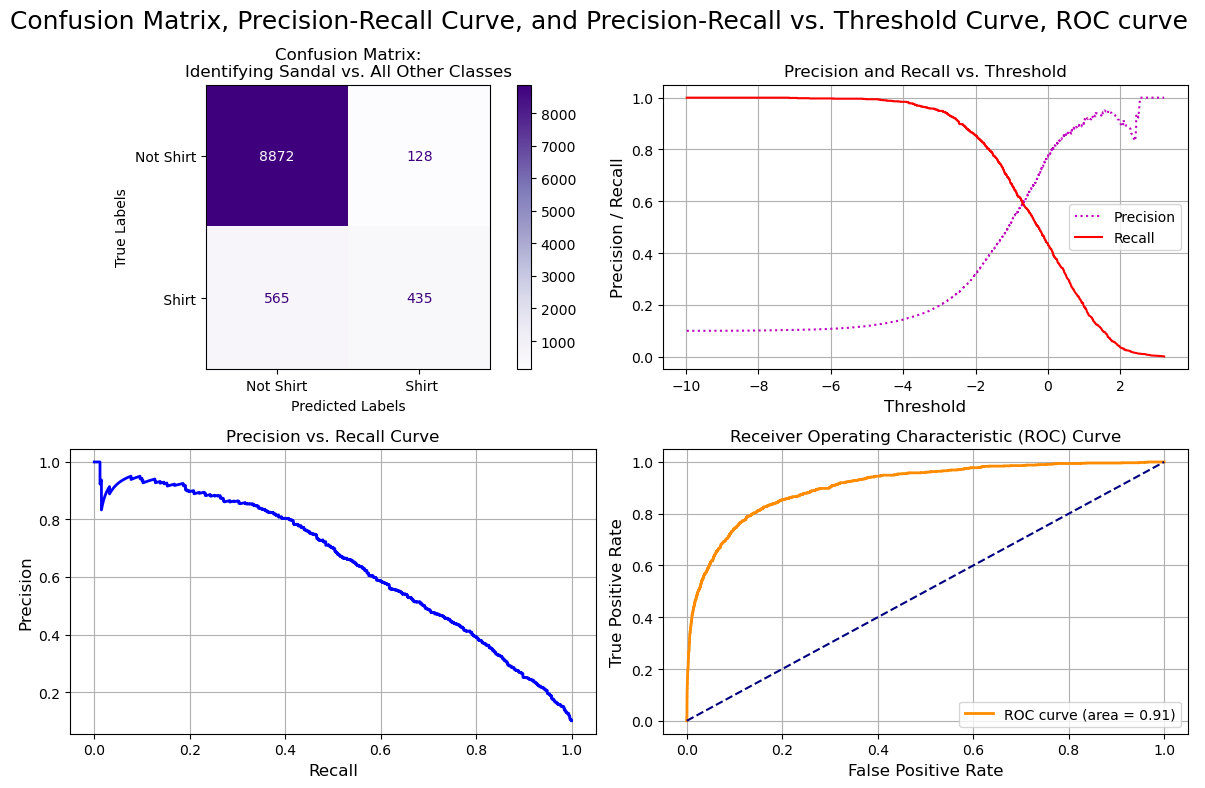

Precision: 0.7726
Recall: 0.4350
F1 Score: 0.5566
Time taken for the process: 4.9623 seconds


In [ ]:
# Binary targets for the "Shirt" class
y_train_6 = (y_train == 6)
y_test_6 = (y_test == 6)

# Timing the model training and prediction
start6 = time.time()
sgd_clf = SGDClassifier(random_state=42, max_iter=10000)
sgd_clf.fit(x_train_MM_scaled, y_train_6.values.ravel())
y_pred_6 = sgd_clf.predict(x_test_MM_scaled)
end6 = time.time()

# Compute decision scores for the precision-recall curve
y_scores6 = sgd_clf.decision_function(x_test_MM_scaled)
precision6, recall6, thresholds6 = precision_recall_curve(y_test_6, y_scores6)

# Calculate scalar precision, recall, and F1 score
precision_val6 = precision_score(y_test_6, y_pred_6)
recall_val6 = recall_score(y_test_6, y_pred_6)
f1_val6 = f1_score(y_test_6, y_pred_6)
# Generate ROC curve values
fpr6, tpr6, thresholds_roc6 = roc_curve(y_test_6, y_scores6)
roc_auc6 = auc(fpr6, tpr6)

# Generate the confusion matrix
conf_matrix6 = confusion_matrix(y_test_6, y_pred_6)

# Plot the confusion matrix and precision-recall curve
plt.figure(figsize=(12, 8))

# Plot the confusion matrix
plt.subplot(2, 2, 1)
disp6 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix6, display_labels=["Not Shirt", " Shirt"])
disp6.plot(cmap=plt.cm.Purples, ax=plt.gca())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix:\nIdentifying Sandal vs. All Other Classes")

# Plot the precision-recall curve
plt.subplot(2, 2, 2)
plt.plot(thresholds6, precision6[:-1], label="Precision", color="m", linestyle=":")
plt.plot(thresholds6, recall6[:-1], label="Recall", color="red", linestyle="-")
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Precision / Recall", fontsize=12)
plt.title("Precision and Recall vs. Threshold")
plt.legend(loc="best")
plt.grid(True)

# Plot precision and recall vs. threshold curve
plt.subplot(2, 2, 3)
plt.plot(recall6, precision6, color="b", linewidth=2)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision vs. Recall Curve")
plt.grid(True)
plt.suptitle("Confusion Matrix, Precision-Recall Curve, and Precision-Recall vs. Threshold Curve, ROC curve ", fontsize=18)

plt.subplot(2,2,4)
plt.plot(fpr6, tpr6, color="darkorange", linewidth=2, label=f"ROC curve (area = {roc_auc6:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\images_from_project\binaryclass6.png")

plt.show()

# Print the matrics and time taken
print(f"Precision: {precision_val6:.4f}")
print(f"Recall: {recall_val6:.4f}")
print(f"F1 Score: {f1_val6:.4f}")
print(f"Time taken for the process: {end6 - start6:.4f} seconds")

#### Confusion Matrix: Identifying Sneaker vs. All Other Classes, Precision-Recall Curve, and Precision-Recall vs. Threshold Curve, ROC curve ####

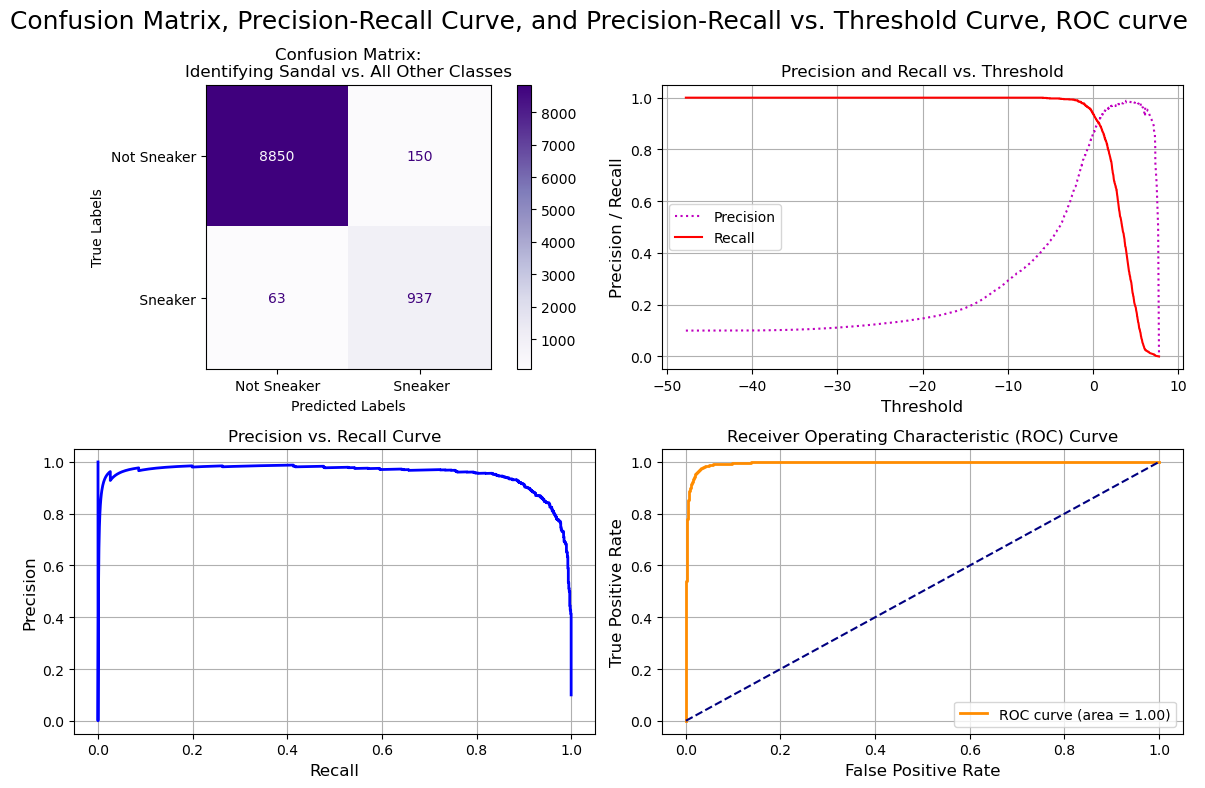

Precision: 0.8620
Recall: 0.9370
F1 Score: 0.8979
Time taken for the process: 2.6458 seconds


In [ ]:
# Binary targets for the "Sneaker" class
y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)

# Timing the model training and prediction
start7 = time.time()
sgd_clf = SGDClassifier(random_state=42, max_iter=10000)
sgd_clf.fit(x_train_MM_scaled, y_train_7.values.ravel())
y_pred_7 = sgd_clf.predict(x_test_MM_scaled)
end7 = time.time()

# Compute decision scores for the precision-recall curve
y_scores7 = sgd_clf.decision_function(x_test_MM_scaled)
precision7, recall7, thresholds7 = precision_recall_curve(y_test_7, y_scores7)

# Calculate scalar precision, recall, and F1 score
precision_val7 = precision_score(y_test_7, y_pred_7)
recall_val7 = recall_score(y_test_7, y_pred_7)
f1_val7 = f1_score(y_test_7, y_pred_7)
# Generate ROC curve values
fpr7, tpr7, thresholds_roc7 = roc_curve(y_test_7, y_scores7)
roc_auc7 = auc(fpr7, tpr7)

# Generate the confusion matrix
conf_matrix7 = confusion_matrix(y_test_7, y_pred_7)

# Plot the confusion matrix and precision-recall curve
plt.figure(figsize=(12, 8))

# Plot the confusion matrix
plt.subplot(2, 2, 1)
disp7 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix7, display_labels=["Not Sneaker", " Sneaker"])
disp7.plot(cmap=plt.cm.Purples, ax=plt.gca())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix:\nIdentifying Sandal vs. All Other Classes")

# Plot the precision-recall curve
plt.subplot(2, 2, 2)
plt.plot(thresholds7, precision7[:-1], label="Precision",color="m", linestyle=":")
plt.plot(thresholds7, recall7[:-1], label="Recall", color="red", linestyle="-")
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Precision / Recall", fontsize=12)
plt.title("Precision and Recall vs. Threshold")
plt.legend(loc="best")
plt.grid(True)

# Plot precision and recall vs. threshold curve
plt.subplot(2, 2, 3)
plt.plot(recall7, precision7, color="b", linewidth=2)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision vs. Recall Curve")
plt.grid(True)
plt.suptitle("Confusion Matrix, Precision-Recall Curve, and Precision-Recall vs. Threshold Curve, ROC curve ", fontsize=18)

plt.subplot(2,2,4)
plt.plot(fpr7, tpr7, color="darkorange", linewidth=2, label=f"ROC curve (area = {roc_auc7:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\images_from_project\binaryclass7.png")

plt.show()

# Print the matrics and time taken
print(f"Precision: {precision_val7:.4f}")
print(f"Recall: {recall_val7:.4f}")
print(f"F1 Score: {f1_val7:.4f}")
print(f"Time taken for the process: {end7 - start7:.4f} seconds")

## Confusion Mtrix at Threshold = -2 & 1 & 6 ##

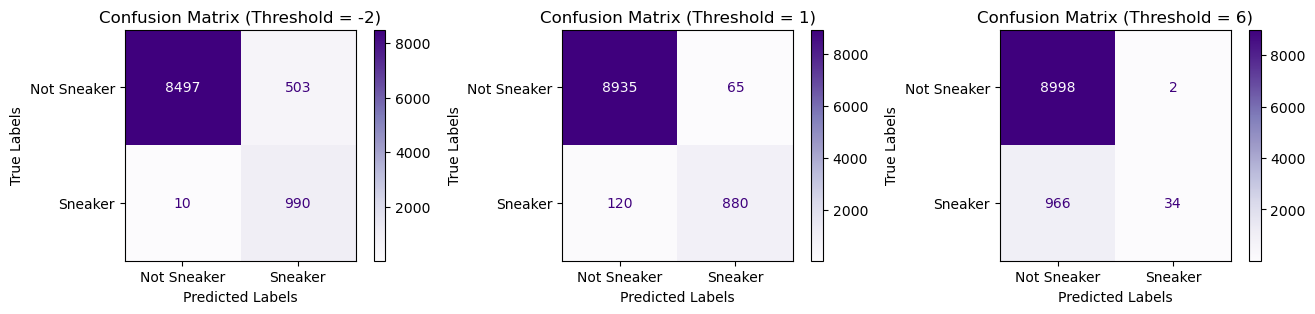

In [ ]:
# Decision scores for the "Sneaker" class
y_scores7 = sgd_clf.decision_function(x_test_MM_scaled)

# Predictions for threshold = -2
threshold_2 = -2
y_pred_threshold_2 = (y_scores7 >= threshold_2).astype(int)
conf_matrix_threshold_2 = confusion_matrix(y_test_7, y_pred_threshold_2)

# Predictions for threshold = 1
threshold_1 = 1
y_pred_threshold_1 = (y_scores7 >= threshold_1).astype(int)
conf_matrix_threshold_1 = confusion_matrix(y_test_7, y_pred_threshold_1)

# Predictions for threshold = 6
threshold_6 = 6
y_pred_threshold_6 = (y_scores7 >= threshold_6).astype(int)
conf_matrix_threshold_6 = confusion_matrix(y_test_7, y_pred_threshold_6)


# Plot the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(16, 3))

# Confusion matrix for threshold -2
disp_2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_threshold_2, display_labels=["Not Sneaker", "Sneaker"])
disp_2.plot(cmap=plt.cm.Purples, ax=axes[0])
axes[0].set_title("Confusion Matrix (Threshold = -2)")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")

# Confusion matrix for threshold 1
disp_1 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_threshold_1, display_labels=["Not Sneaker", "Sneaker"])
disp_1.plot(cmap=plt.cm.Purples, ax=axes[1])
axes[1].set_title("Confusion Matrix (Threshold = 1)")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")
# Confusion matrix for threshold 6
disp_6 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_threshold_6, display_labels=["Not Sneaker", "Sneaker"])
disp_6.plot(cmap=plt.cm.Purples, ax=axes[2])
axes[2].set_title("Confusion Matrix (Threshold = 6)")
axes[2].set_xlabel("Predicted Labels")
axes[2].set_ylabel("True Labels")
plt.savefig(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\images_from_project\binaryclass7thres0&3.png")

plt.show()


#### Confusion Matrix: Identifying Bag vs. All Other Classes, Precision-Recall Curve, and Precision-Recall vs. Threshold Curve, ROC curve ####

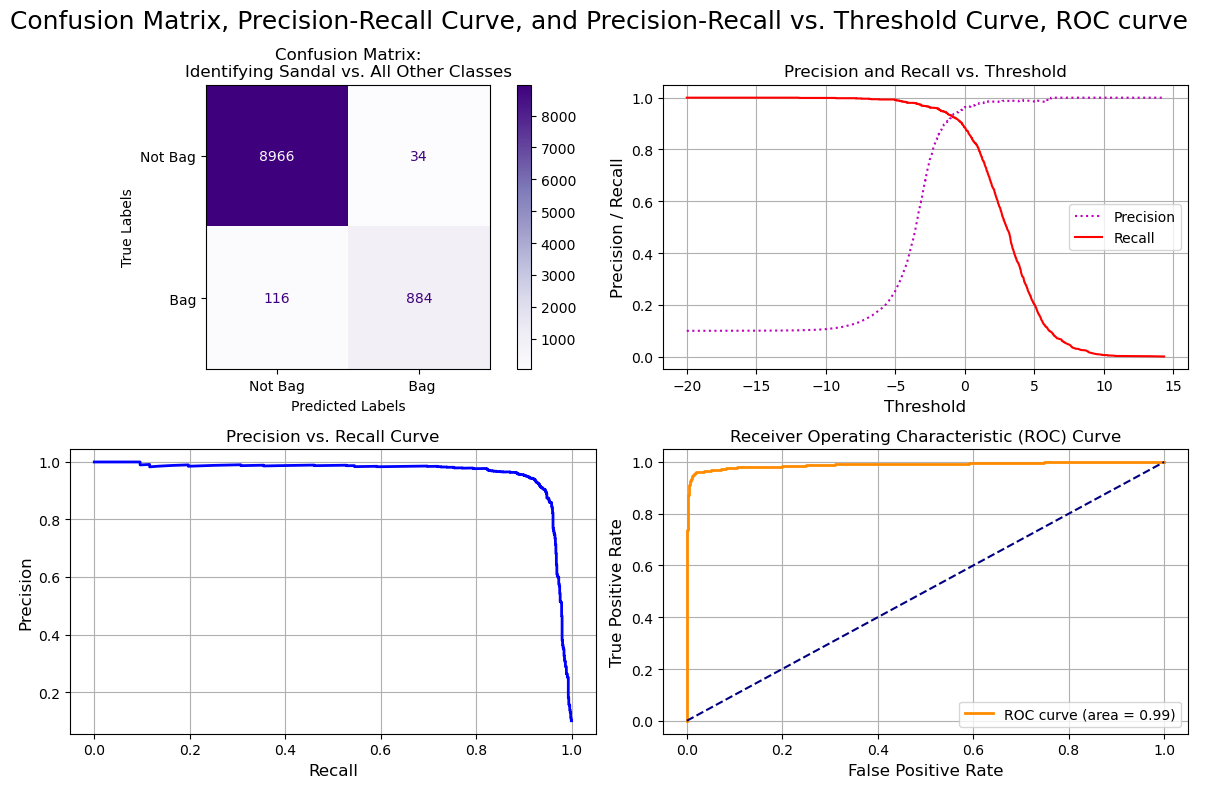

Precision: 0.9630
Recall: 0.8840
F1 Score: 0.9218
Time taken for the process: 2.1860 seconds


In [ ]:
# Binary targets for the "Bag" class
y_train_8 = (y_train == 8)
y_test_8 = (y_test == 8)

# Timing the model training and prediction
start8 = time.time()
sgd_clf = SGDClassifier(random_state=42, max_iter=10000)
sgd_clf.fit(x_train_MM_scaled, y_train_8.values.ravel())
y_pred_8 = sgd_clf.predict(x_test_MM_scaled)
end8 = time.time()

# Compute decision scores for the precision-recall curve
y_scores8 = sgd_clf.decision_function(x_test_MM_scaled)
precision8, recall8, thresholds8 = precision_recall_curve(y_test_8, y_scores8)

# Calculate scalar precision, recall, and F1 score
precision_val8 = precision_score(y_test_8, y_pred_8)
recall_val8 = recall_score(y_test_8, y_pred_8)
f1_val8 = f1_score(y_test_8, y_pred_8)
# Generate ROC curve values
fpr8, tpr8, thresholds_roc8 = roc_curve(y_test_8, y_scores8)
roc_auc8 = auc(fpr8, tpr8)

# Generate the confusion matrix
conf_matrix8 = confusion_matrix(y_test_8, y_pred_8)

# Plot the confusion matrix and precision-recall curve
plt.figure(figsize=(12, 8))

# Plot the confusion matrix
plt.subplot(2, 2, 1)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix8, display_labels=["Not Bag", " Bag"])
disp.plot(cmap=plt.cm.Purples, ax=plt.gca())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix:\nIdentifying Sandal vs. All Other Classes")

# Plot the precision-recall curve
plt.subplot(2, 2, 2)
plt.plot(thresholds8, precision8[:-1], label="Precision", color="m", linestyle=":")
plt.plot(thresholds8, recall8[:-1], label="Recall", color="red", linestyle="-")
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Precision / Recall", fontsize=12)
plt.title("Precision and Recall vs. Threshold")
plt.legend(loc="best")
plt.grid(True)

# Plot precision and recall vs. threshold curve
plt.subplot(2, 2, 3)
plt.plot(recall8, precision8, color="b", linewidth=2)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision vs. Recall Curve")
plt.grid(True)
plt.suptitle("Confusion Matrix, Precision-Recall Curve, and Precision-Recall vs. Threshold Curve, ROC curve ", fontsize=18)

plt.subplot(2,2,4)
plt.plot(fpr8, tpr8, color="darkorange", linewidth=2, label=f"ROC curve (area = {roc_auc8:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\images_from_project\binaryclass8.png")

plt.show()

# Print the matrics and time taken
print(f"Precision: {precision_val8:.4f}")
print(f"Recall: {recall_val8:.4f}")
print(f"F1 Score: {f1_val8:.4f}")
print(f"Time taken for the process: {end8 - start8:.4f} seconds")

#### Confusion Matrix: Identifying Ankle Boot vs. All Other Classes, Precision-Recall Curve, and Precision-Recall vs. Threshold Curve, ROC curve ####

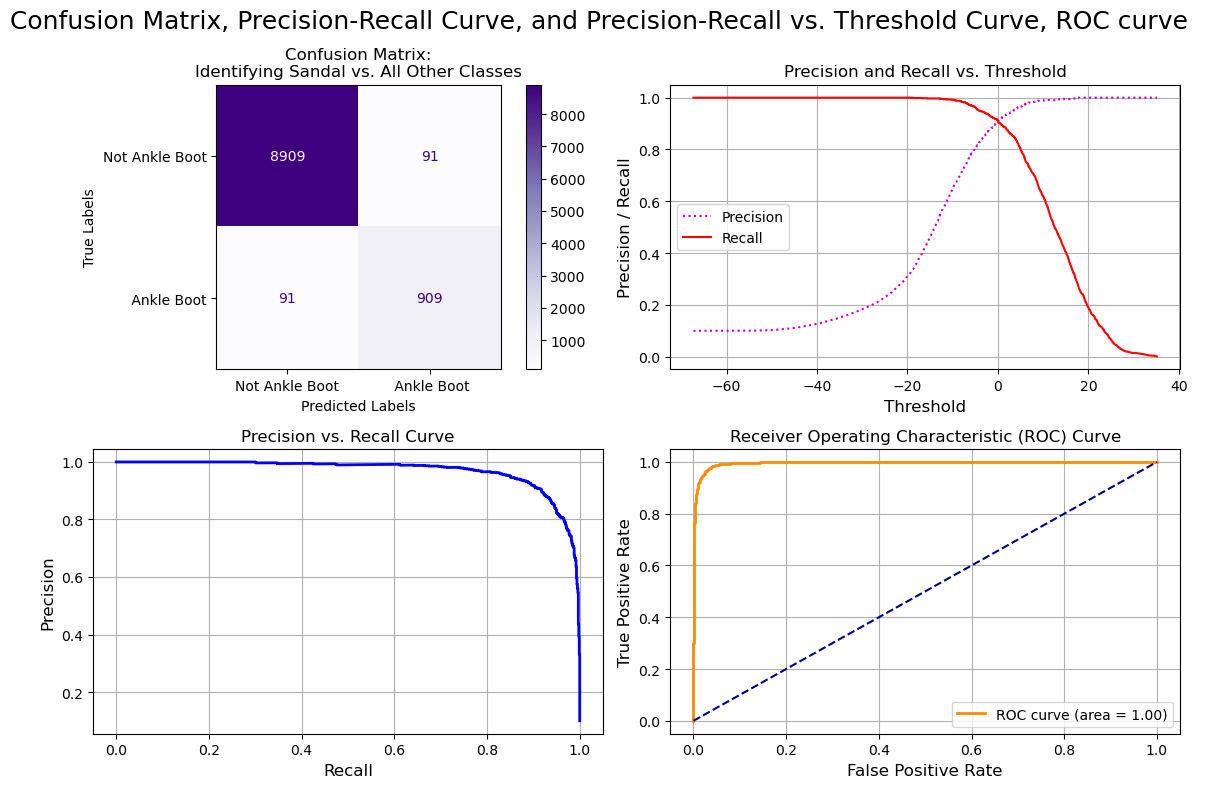

Precision: 0.9090
Recall: 0.9090
F1 Score: 0.9090
Time taken for the process: 6.2584 seconds


In [ ]:
# Binary targets for the "Ankle Boot" class
y_train_9 = (y_train == 9)
y_test_9 = (y_test == 9)

# Timing the model training and prediction
start9 = time.time()
sgd_clf = SGDClassifier(random_state=42, max_iter=10000)
sgd_clf.fit(x_train_MM_scaled, y_train_9.values.ravel())
y_pred_9 = sgd_clf.predict(x_test_MM_scaled)
end9 = time.time()

# Compute decision scores for the precision-recall curve
y_scores9 = sgd_clf.decision_function(x_test_MM_scaled)
precision9, recall9, thresholds9 = precision_recall_curve(y_test_9, y_scores9)

# Calculate scalar precision, recall, and F1 score
precision_val9 = precision_score(y_test_9, y_pred_9)
recall_val9 = recall_score(y_test_9, y_pred_9)
f1_val9 = f1_score(y_test_9, y_pred_9)
# Generate ROC curve values
fpr9, tpr9, thresholds_roc9 = roc_curve(y_test_9, y_scores9)
roc_auc9 = auc(fpr9, tpr9)

# Generate the confusion matrix
conf_matrix9 = confusion_matrix(y_test_9, y_pred_9)

# Plot the confusion matrix and precision-recall curve
plt.figure(figsize=(12, 8))

# Plot the confusion matrix
plt.subplot(2, 2, 1)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix9, display_labels=["Not Ankle Boot", " Ankle Boot"])
disp.plot(cmap=plt.cm.Purples, ax=plt.gca())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix:\nIdentifying Sandal vs. All Other Classes")

# Plot the precision-recall curve
plt.subplot(2, 2, 2)
plt.plot(thresholds9, precision9[:-1], label="Precision",color="m", linestyle=":")
plt.plot(thresholds9, recall9[:-1], label="Recall", color="red", linestyle="-")
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Precision / Recall", fontsize=12)
plt.title("Precision and Recall vs. Threshold")
plt.legend(loc="best")
plt.grid(True)

# Plot precision and recall vs. threshold curve
plt.subplot(2, 2, 3)
plt.plot(recall9, precision9, color="b", linewidth=2)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision vs. Recall Curve")
plt.grid(True)
plt.suptitle("Confusion Matrix, Precision-Recall Curve, and Precision-Recall vs. Threshold Curve, ROC curve ", fontsize=18)

plt.subplot(2,2,4)
plt.plot(fpr9, tpr9, color="darkorange", linewidth=2, label=f"ROC curve (area = {roc_auc9:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\images_from_project\binaryclass9.png")

plt.show()

# Print the matrics and time taken
print(f"Precision: {precision_val9:.4f}")
print(f"Recall: {recall_val9:.4f}")
print(f"F1 Score: {f1_val9:.4f}")
print(f"Time taken for the process: {end9 - start9:.4f} seconds")

## classification report of all one vs all classifications ##

In [ ]:
# Your class names and test/prediction data
y_test_models = [y_test_0, y_test_1, y_test_2, y_test_3, y_test_4, y_test_5, y_test_6, y_test_7, y_test_8, y_test_9]
y_pred_models = [y_pred_0, y_pred_1, y_pred_2, y_pred_3, y_pred_4, y_pred_5, y_pred_6, y_pred_7, y_pred_8, y_pred_9]
# Replace start and end times here with the actual times from your model training
starting = [start0, start1, start2, start3, start4, start5, start6, start7, start8, start9]
ending = [end0, end1, end2, end3, end4, end5, end6, end7, end8, end9]

precision_values = []
recall_values = []
elapsed_times = []
# Calculate precision, recall, and time for each model
for i in range(10):
    precision = precision_score(y_test_models[i], y_pred_models[i])
    recall = recall_score(y_test_models[i], y_pred_models[i])
    elapsed_time = round(ending[i] - starting[i], 4)
    precision_values.append(precision)
    recall_values.append(recall)
    elapsed_times.append(elapsed_time)
results_df = pd.DataFrame({"Classification": [f"{class_names[i]} vs. all" for i in range(10)],"Precision": precision_values,
                           "Recall": recall_values,"Time taken(s)": elapsed_times})
print(results_df.to_markdown())


|    | Classification      |   Precision |   Recall |   Time taken(s) |
|---:|:--------------------|------------:|---------:|----------------:|
|  0 | T-shirt/top vs. all |    0.84023  |    0.731 |          5.8607 |
|  1 | Trouser vs. all     |    0.975    |    0.975 |          1.9799 |
|  2 | Pullover vs. all    |    0.669983 |    0.808 |          5.4852 |
|  3 | Dress vs. all       |    0.898483 |    0.77  |          3.219  |
|  4 | Coat vs. all        |    0.786553 |    0.737 |          4.8217 |
|  5 | Sandal vs. all      |    0.933972 |    0.877 |          2.1194 |
|  6 | Shirt vs. all       |    0.772647 |    0.435 |          4.9623 |
|  7 | Sneaker vs. all     |    0.862006 |    0.937 |          2.6458 |
|  8 | Bag vs. all         |    0.962963 |    0.884 |          2.186  |
|  9 | Ankle boot vs. all  |    0.909    |    0.909 |          6.2584 |


## Decision Tree ##

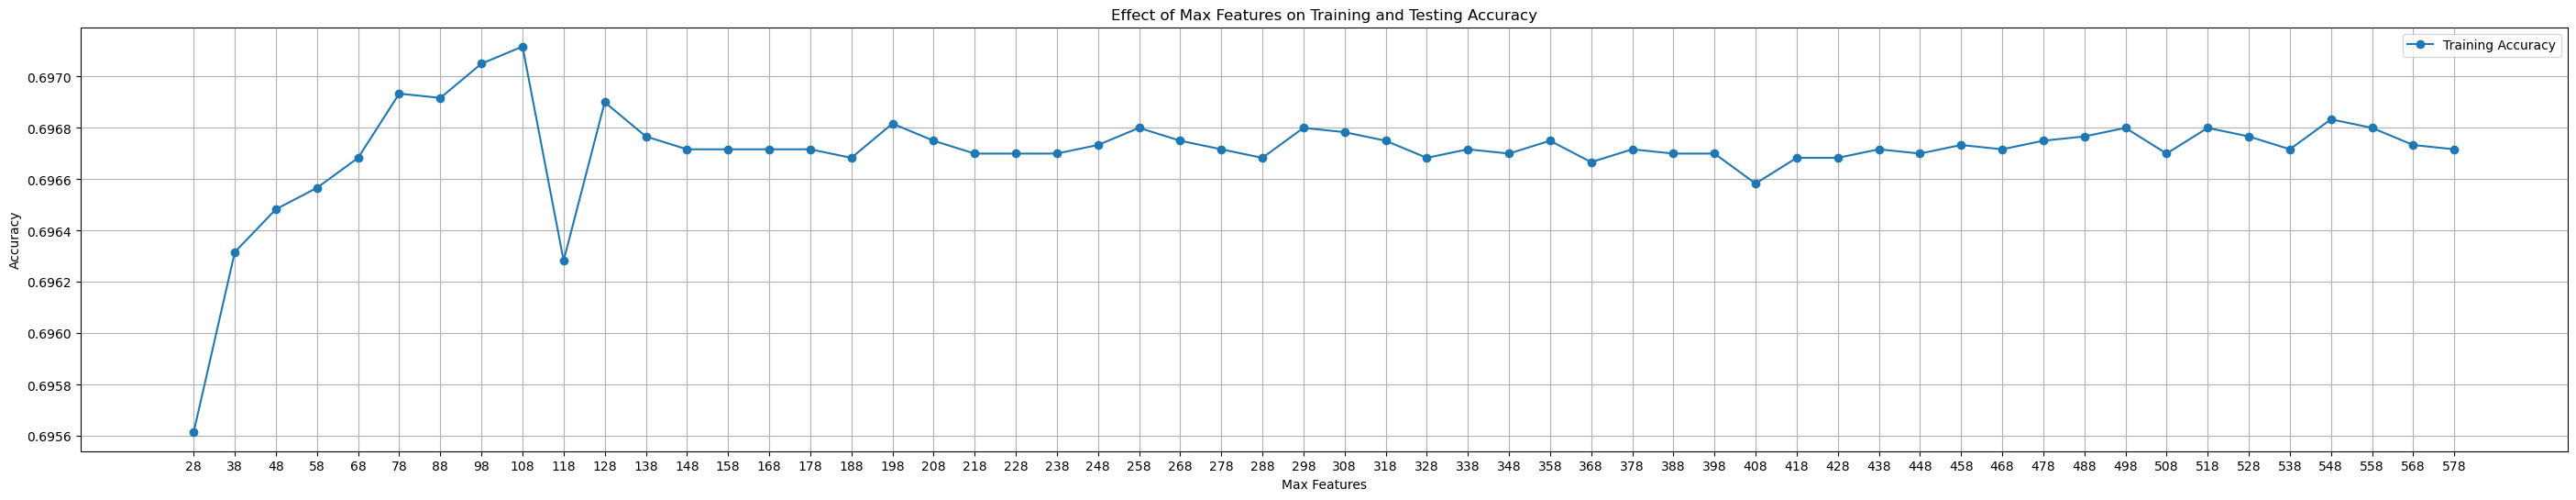

Time taken for the all predictions: 2402.4504 seconds


In [ ]:
# Define the range for max_features
max_features_range = range(28, 588, 10)  # Increment by 28 to get steps within 28 to 392
# Lists to store accuracies
train_accuracies = []
# Loop through the max_features range
start=time.time()
for max_features in max_features_range:
    # Initialize and train the Decision Tree Classifier
    pca = PCA(n_components=max_features)
    x_train_pca = pca.fit_transform(x_train_MM_scaled)
    dt_clf = DecisionTreeClassifier(criterion='gini', max_features=max_features, max_depth=7)
    dt_clf.fit(x_train_pca, y_train)
    # Make predictions on training and test sets
    y_pred_train = dt_clf.predict(x_train_pca)
    # Calculate accuracy for both sets
    train_accuracy = accuracy_score(y_train, y_pred_train)
    # Store accuracies in the lists
    train_accuracies.append(train_accuracy)
stop=time.time()

# Plot max_features vs accuracy for both sets
plt.figure(figsize=(35, 6))
plt.plot(max_features_range, train_accuracies, label='Training Accuracy', marker='o')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('Effect of Max Features on Training and Testing Accuracy')
plt.xticks(max_features_range)
plt.grid(True)
plt.legend()
plt.savefig(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\images_from_project\DTmaxfeaturesfind.png")
plt.show()
print(f"Time taken for the all predictions: {stop - start:.4f} seconds")


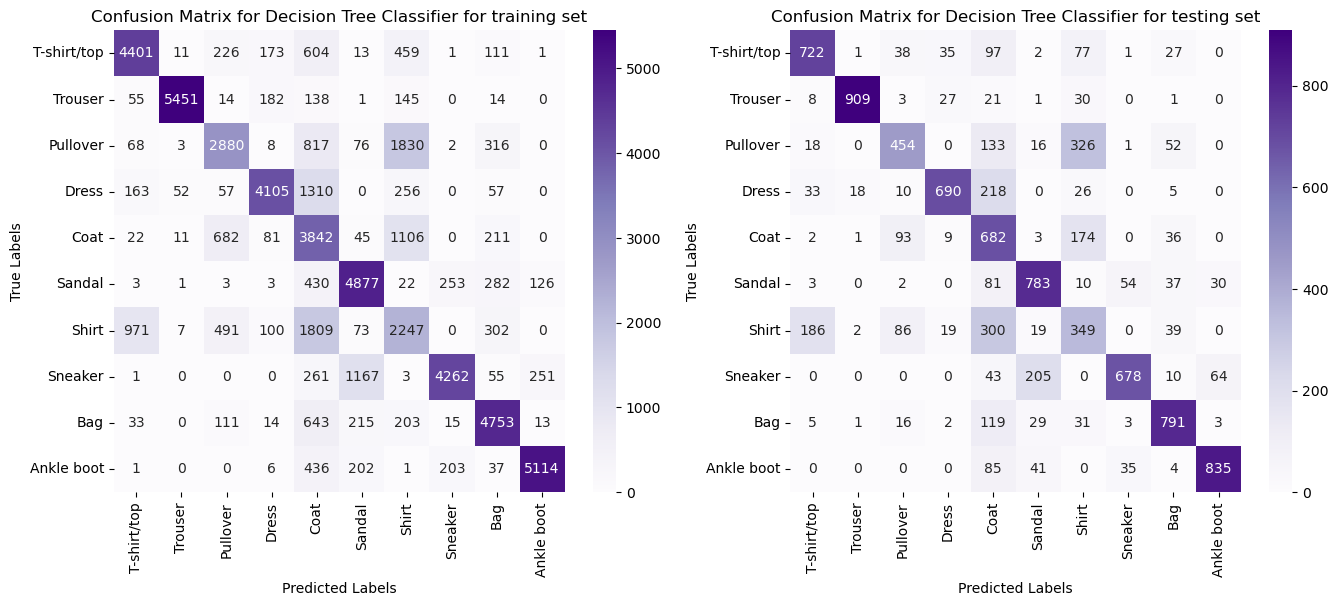

Training Accuracy: 0.6989
Test Accuracy: 0.6893

Classification Report on train set:
|              |   precision |   recall |   f1-score |      support |
|:-------------|------------:|---------:|-----------:|-------------:|
| T-shirt/top  |    0.769675 | 0.7335   |   0.751152 |  6000        |
| Trouser      |    0.984646 | 0.9085   |   0.945042 |  6000        |
| Pullover     |    0.645161 | 0.48     |   0.550459 |  6000        |
| Dress        |    0.878639 | 0.684167 |   0.769303 |  6000        |
| Coat         |    0.373372 | 0.640333 |   0.4717   |  6000        |
| Sandal       |    0.731294 | 0.812833 |   0.769911 |  6000        |
| Shirt        |    0.358259 | 0.3745   |   0.366199 |  6000        |
| Sneaker      |    0.899916 | 0.710333 |   0.793964 |  6000        |
| Bag          |    0.774356 | 0.792167 |   0.78316  |  6000        |
| Ankle boot   |    0.928974 | 0.852333 |   0.889005 |  6000        |
| accuracy     |    0.698867 | 0.698867 |   0.698867 |     0.698867 |
| mac

In [ ]:
# Apply PCA to the training and testing data
pca = PCA(n_components=118)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Train the Decision Tree Classifier with max_features set to 288
dt_clf = DecisionTreeClassifier(criterion='gini', max_features=118, max_depth=7, random_state=42)
start=time.time()
dt_clf.fit(x_train_pca, y_train)
end=time.time()

# Make predictions
y_pred_train = dt_clf.predict(x_train_pca)
y_pred_test = dt_clf.predict(x_test_pca)

# Confusion Matrix for training set
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(conf_matrix_train, annot=True, xticklabels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
            yticklabels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], fmt="d", cmap="Purples")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Decision Tree Classifier for training set")
plt.savefig(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\confusion_matrix_training.png")

# Confusion Matrix for testing set
plt.subplot(1, 2, 2)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix_test, annot=True, xticklabels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
            yticklabels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], fmt="d", cmap="Purples")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Decision Tree Classifier for testing set")
plt.savefig(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\images_from_project\DTconfusion_matrix_pca288.png")  # Save the testing plot as an image file
plt.show()

# Evaluate the Model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification Report
report_train = classification_report(y_train, y_pred_train, target_names=class_names, output_dict=True)
report_test = classification_report(y_test, y_pred_test, target_names=class_names, output_dict=True)
df_train = pd.DataFrame(report_train).T
df_test = pd.DataFrame(report_test).T
print("\nClassification Report on train set:")
print(df_train.to_markdown())
print("\nClassification Report on test set:")
print(df_test.to_markdown())
print(f"Time required to train  {end-start} seconds")

## Creating a dot file of decision tree ##

In [ ]:
dot_file_path = r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\images_from_project\decision_tree7.dot"
export_graphviz(dt_clf,  out_file=dot_file_path,
    class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker',  'Bag','Ankle boot'],
    rounded=True,filled=True)

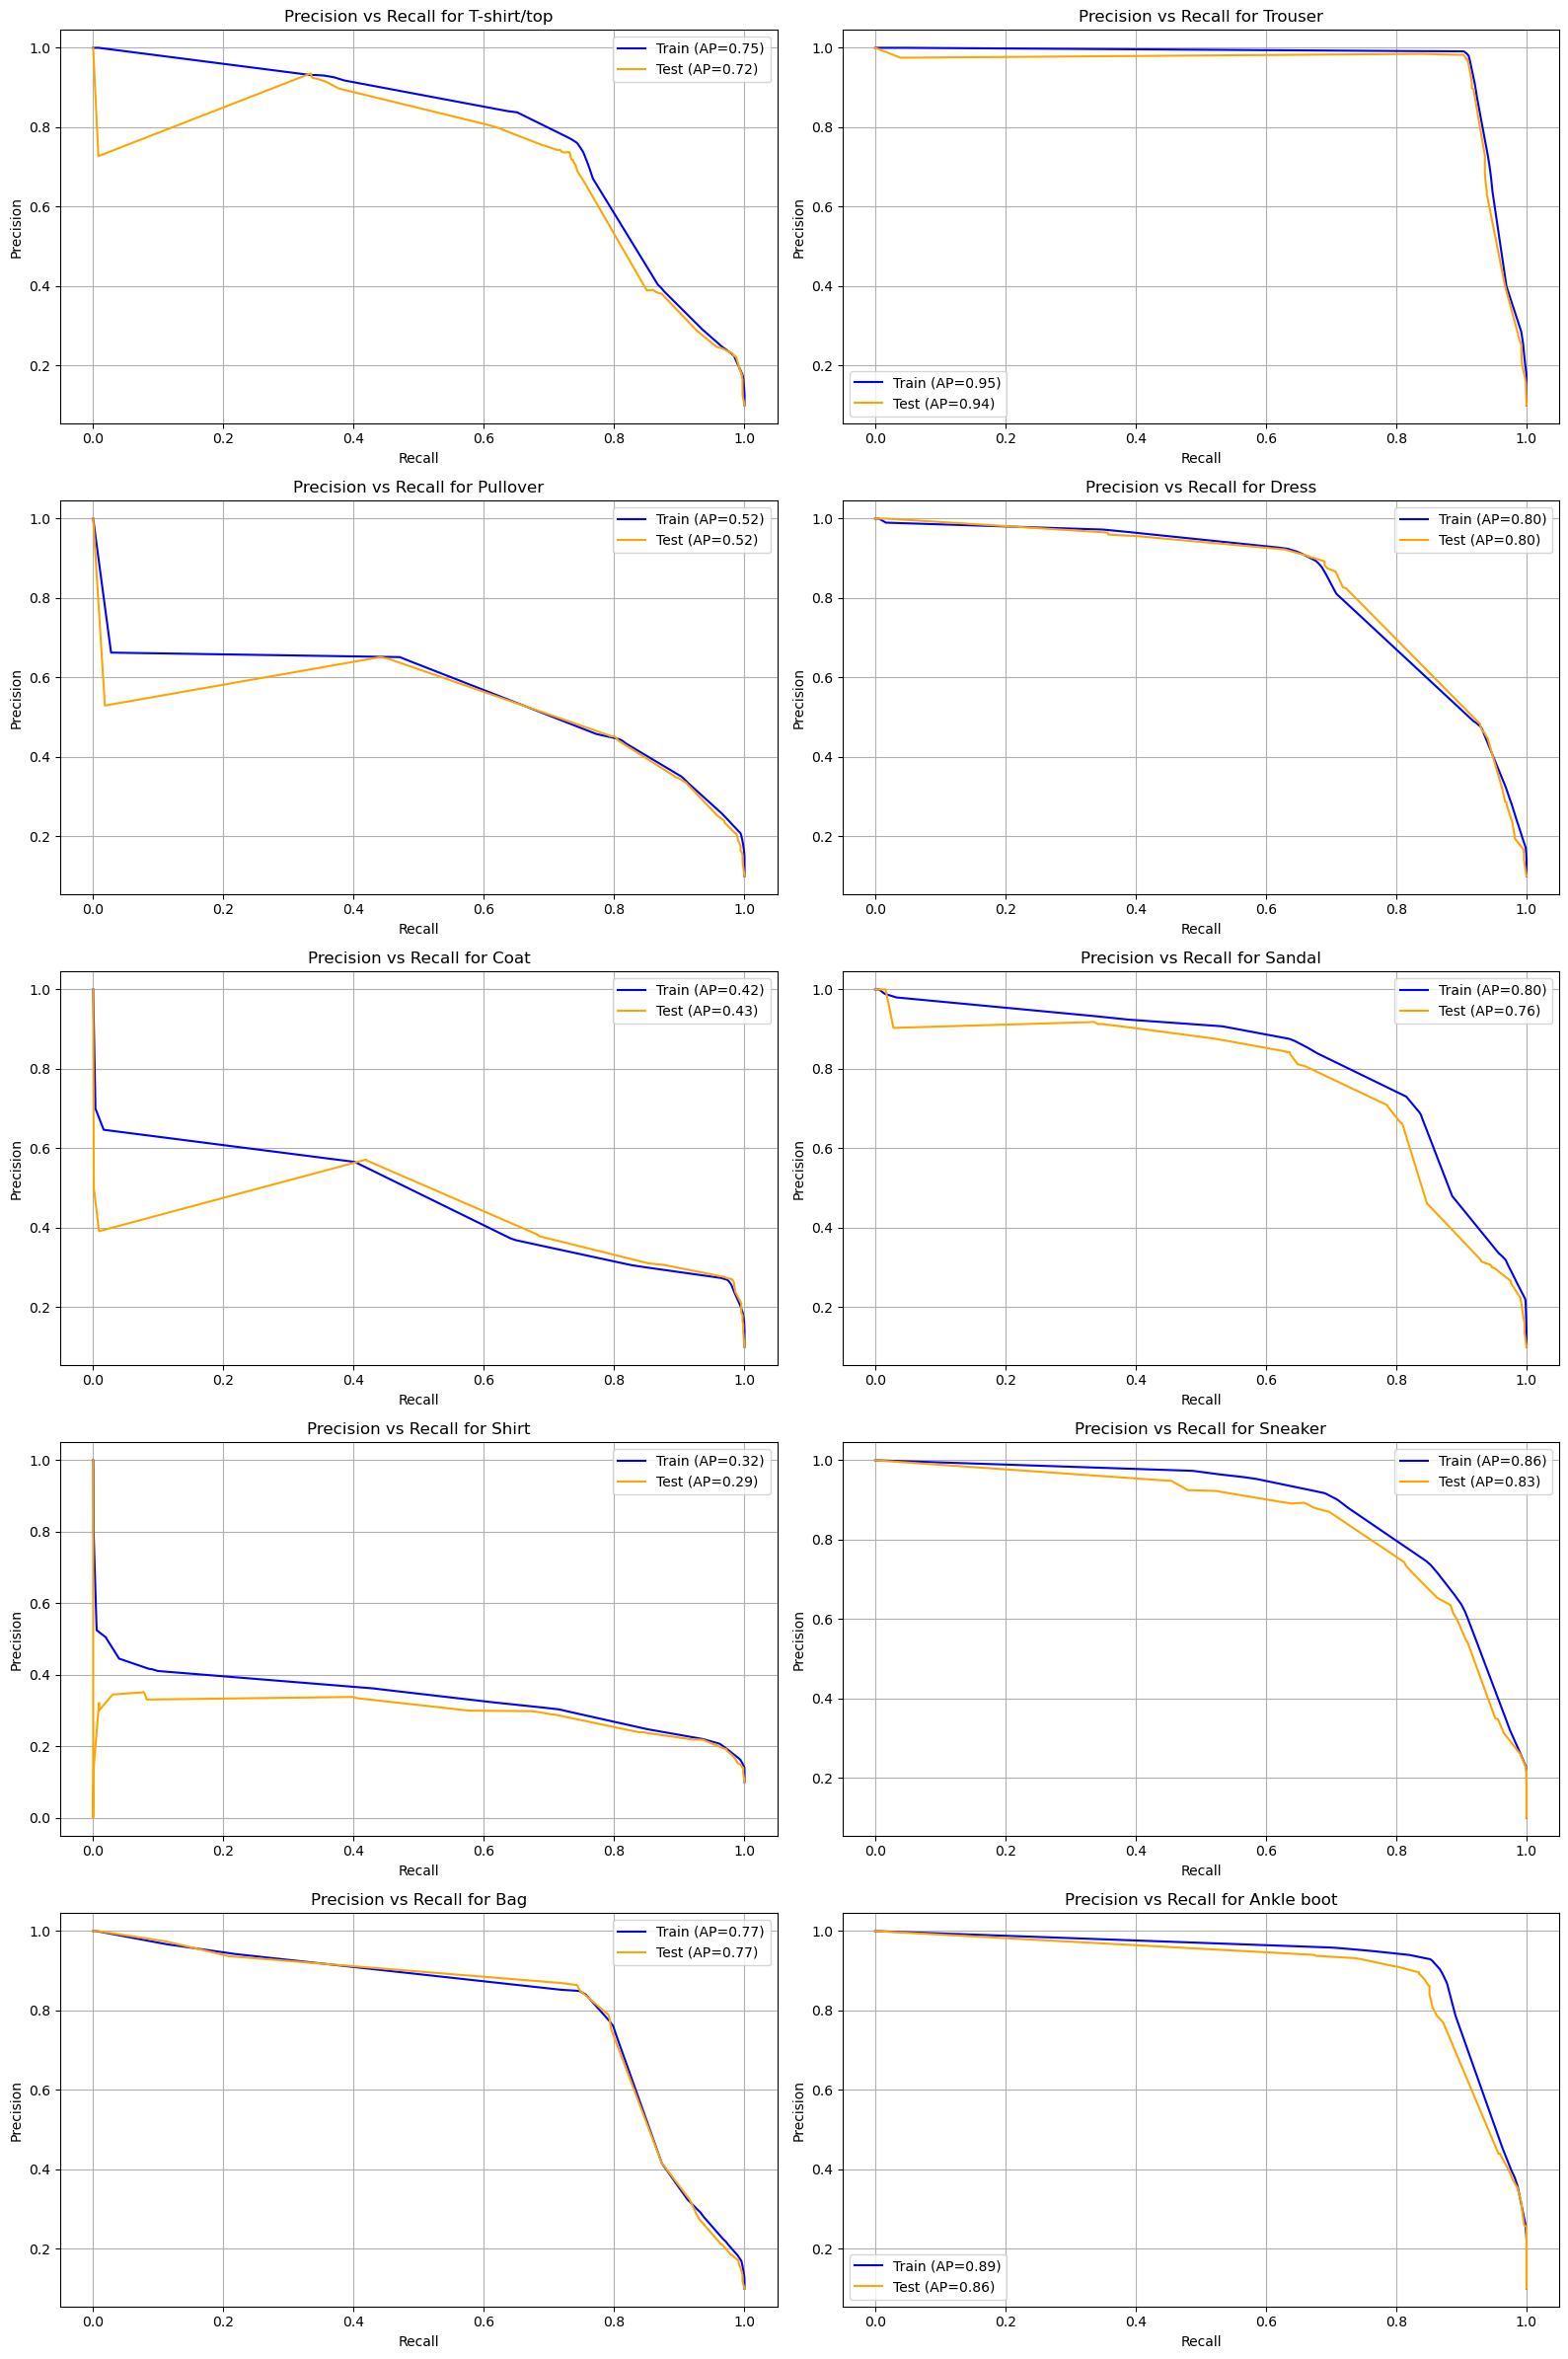

In [ ]:
n_classes = len(class_names)
y_train_binarized = label_binarize(y_train, classes=list(range(n_classes)))
y_test_binarized = label_binarize(y_test, classes=list(range(n_classes)))

# Get predicted probabilities
y_train_proba = dt_clf.predict_proba(x_train_pca)
y_test_proba = dt_clf.predict_proba(x_test_pca)

# Plot Precision-Recall curves
plt.figure(figsize=(16, 24))
for i in range(n_classes):
    plt.subplot(5, 2, i + 1)

    # Training set PR curve
    precision_train, recall_train, _ = precision_recall_curve(y_train_binarized[:, i], y_train_proba[:, i])
    avg_precision_train = average_precision_score(y_train_binarized[:, i], y_train_proba[:, i])
    plt.plot(recall_train, precision_train, label=f'Train (AP={avg_precision_train:.2f})', color='blue')

    # Testing set PR curve
    precision_test, recall_test, _ = precision_recall_curve(y_test_binarized[:, i], y_test_proba[:, i])
    avg_precision_test = average_precision_score(y_test_binarized[:, i], y_test_proba[:, i])
    plt.plot(recall_test, precision_test, label=f'Test (AP={avg_precision_test:.2f})', color='orange')

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision vs Recall for {class_names[i]}")
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.savefig(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\images_from_project\DT_PR_Curve_AllClasses.png")
plt.show()


## Bagging ##

OOB Score: 0.7083
Training Accuracy: 0.7175
Test Accuracy: 0.7069


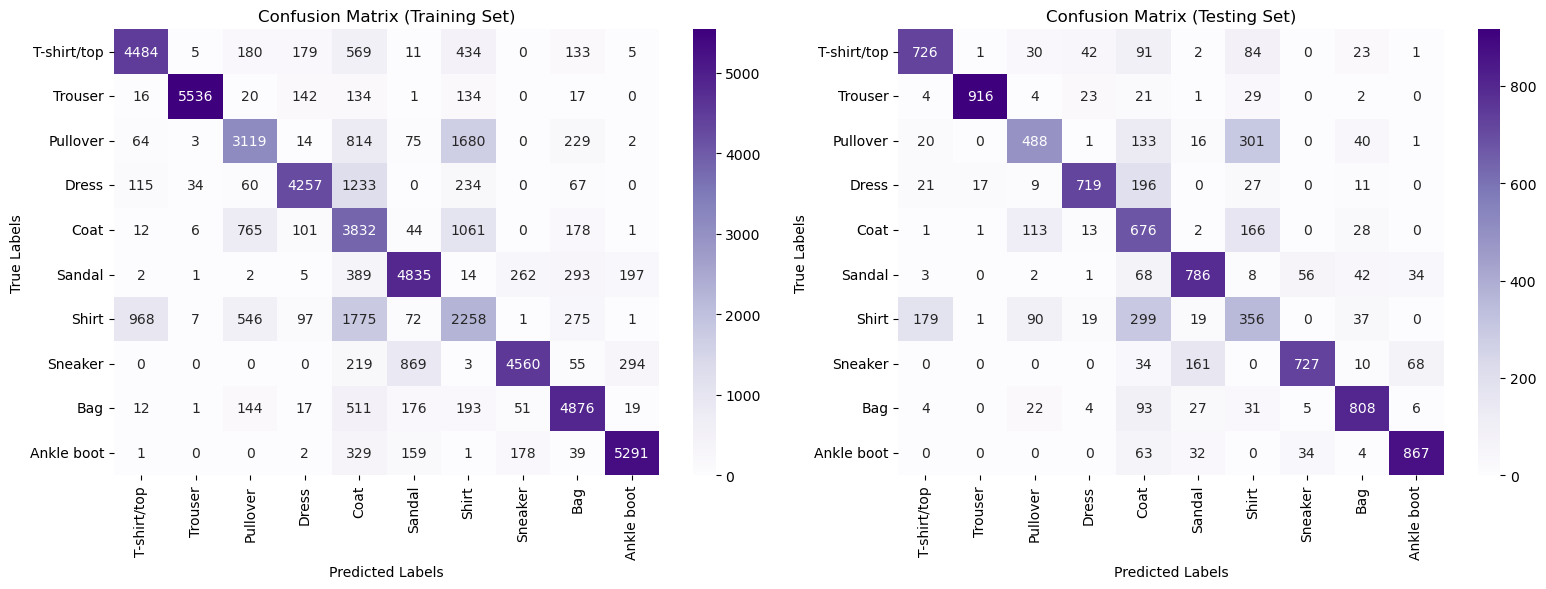


Classification Report on train set:
|              |   precision |   recall |   f1-score |      support |
|:-------------|------------:|---------:|-----------:|-------------:|
| T-shirt/top  |    0.790271 | 0.747333 |   0.768203 |  6000        |
| Trouser      |    0.989809 | 0.922667 |   0.955059 |  6000        |
| Pullover     |    0.644955 | 0.519833 |   0.575674 |  6000        |
| Dress        |    0.884296 | 0.7095   |   0.787313 |  6000        |
| Coat         |    0.390821 | 0.638667 |   0.48491  |  6000        |
| Sandal       |    0.774591 | 0.805833 |   0.789904 |  6000        |
| Shirt        |    0.375582 | 0.376333 |   0.375957 |  6000        |
| Sneaker      |    0.902613 | 0.76     |   0.82519  |  6000        |
| Bag          |    0.791302 | 0.812667 |   0.801842 |  6000        |
| Ankle boot   |    0.910671 | 0.881833 |   0.89602  |  6000        |
| accuracy     |    0.717467 | 0.717467 |   0.717467 |     0.717467 |
| macro avg    |    0.745491 | 0.717467 |   0.726007 

In [ ]:
# Initialize the Bagging Classifier with Decision Tree
pca = PCA(n_components=118)
x_train_pca = pca.fit_transform(x_train_MM_scaled)
x_test_pca = pca.transform(x_test_MM_scaled)

bagging_clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_features=118, max_depth=7),
    n_estimators=350, max_samples=0.7, oob_score=True)

# Train the Bagging Classifier
start_time = time.time()
bagging_clf.fit(x_train_pca, y_train.values.ravel())
end_time = time.time()

# OOB score
oob_score = bagging_clf.oob_score_
print(f"OOB Score: {oob_score:.4f}")

# Predictions
y_pred_train = bagging_clf.predict(x_train_pca)
y_pred_test = bagging_clf.predict(x_test_pca)

# Evaluate the Model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion Matrix for Training and Testing Set
plt.figure(figsize=(16, 6))

# Training Confusion Matrix
plt.subplot(1, 2, 1)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Training Set)")

# Testing Confusion Matrix
plt.subplot(1, 2, 2)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Testing Set)")

plt.tight_layout()
plt.savefig(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\images_from_project\bagging_confusion_matrix.png")
plt.show()

# Classification Reports
report_train = classification_report(y_train, y_pred_train, target_names=class_names, output_dict=True)
report_test = classification_report(y_test, y_pred_test, target_names=class_names, output_dict=True)
df_train = pd.DataFrame(report_train).T
df_test = pd.DataFrame(report_test).T
print("\nClassification Report on train set:")
print(df_train.to_markdown())
print("\nClassification Report on test set:")
print(df_test.to_markdown())

print(f"Time taken to train and predict: {end_time - start_time:.4f} seconds")


# ADA boost ##

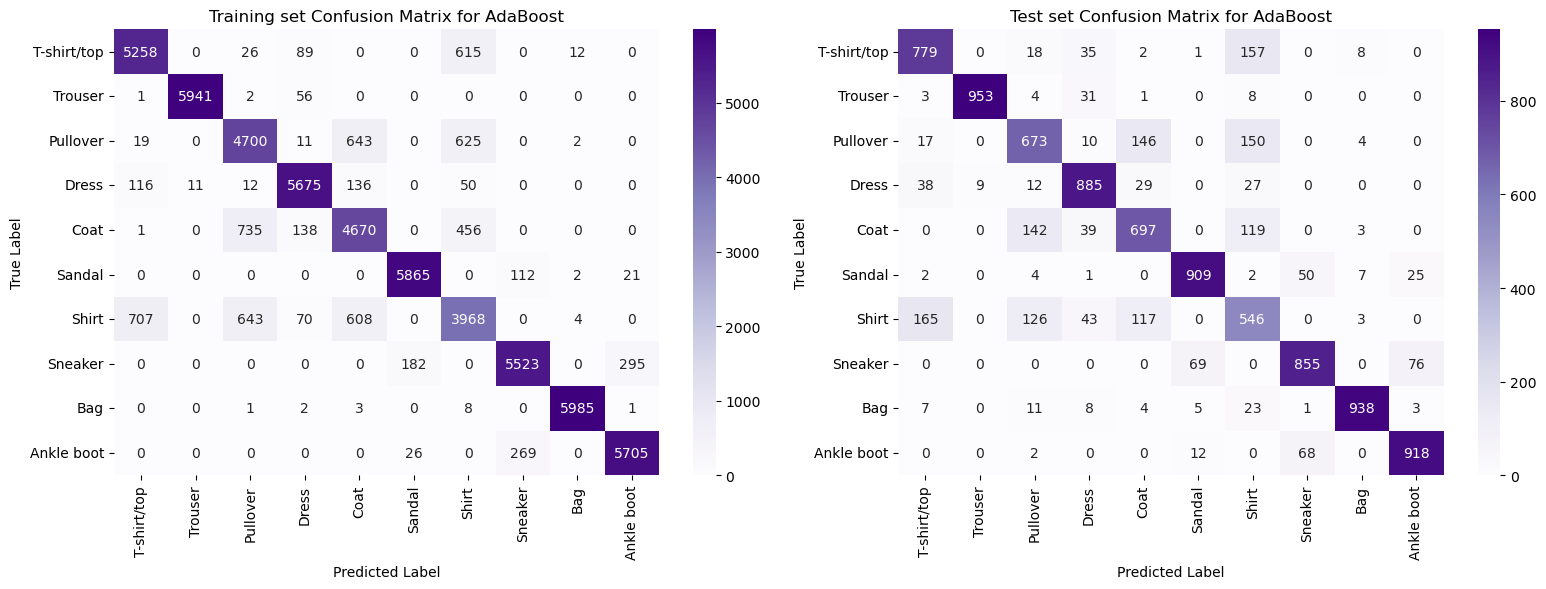

Training Accuracy: 0.8881666666666667
Test Accuracy: 0.8153

Classification Report on train set:
|              |   precision |   recall |   f1-score |      support |
|:-------------|------------:|---------:|-----------:|-------------:|
| T-shirt/top  |    0.861685 | 0.876333 |   0.868947 |  6000        |
| Trouser      |    0.998152 | 0.990167 |   0.994143 |  6000        |
| Pullover     |    0.768099 | 0.783333 |   0.775642 |  6000        |
| Dress        |    0.939414 | 0.945833 |   0.942613 |  6000        |
| Coat         |    0.770627 | 0.778333 |   0.774461 |  6000        |
| Sandal       |    0.96575  | 0.9775   |   0.971589 |  6000        |
| Shirt        |    0.693464 | 0.661333 |   0.677018 |  6000        |
| Sneaker      |    0.935467 | 0.9205   |   0.927923 |  6000        |
| Bag          |    0.996669 | 0.9975   |   0.997085 |  6000        |
| Ankle boot   |    0.94736  | 0.950833 |   0.949093 |  6000        |
| accuracy     |    0.888167 | 0.888167 |   0.888167 |     0.88

In [ ]:
pca = PCA(n_components=118)
x_train_pca = pca.fit_transform(x_train_MM_scaled)
x_test_pca = pca.transform(x_test_MM_scaled)

dt_clf = DecisionTreeClassifier(max_depth=7, random_state=42)

# Initialize the AdaBoost model
adaboost_model = AdaBoostClassifier(dt_clf, algorithm='SAMME', n_estimators=200, random_state=42)

# Train the AdaBoost model
start=time.time()
adaboost_model.fit(x_train_pca, y_train.values.ravel())
end=time.time()

# Make predictions
y_pred_train = adaboost_model.predict(x_train_pca)
y_pred_test = adaboost_model.predict(x_test_pca)


train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
conf_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(conf_train, annot=True, fmt="d", cmap="Purples", xticklabels=class_names, yticklabels=class_names)
plt.title("Training set Confusion Matrix for AdaBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.subplot(1,2,2)
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=class_names, yticklabels=class_names)
plt.title("Test set Confusion Matrix for AdaBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\images_from_project\adaboost_confusion_matrix.png")
plt.show()

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
report_train = classification_report(y_train, y_pred_train, target_names=class_names, output_dict=True)
report_test = classification_report(y_test, y_pred_test, target_names=class_names, output_dict=True)
df_train = pd.DataFrame(report_train).T
df_test = pd.DataFrame(report_test).T
print("\nClassification Report on train set:")
print(df_train.to_markdown())
print("\nClassification Report on test set:")
print(df_test.to_markdown())
print(f"Time taken to train and predict: {end - start:.4f} seconds")

## Random forest ##

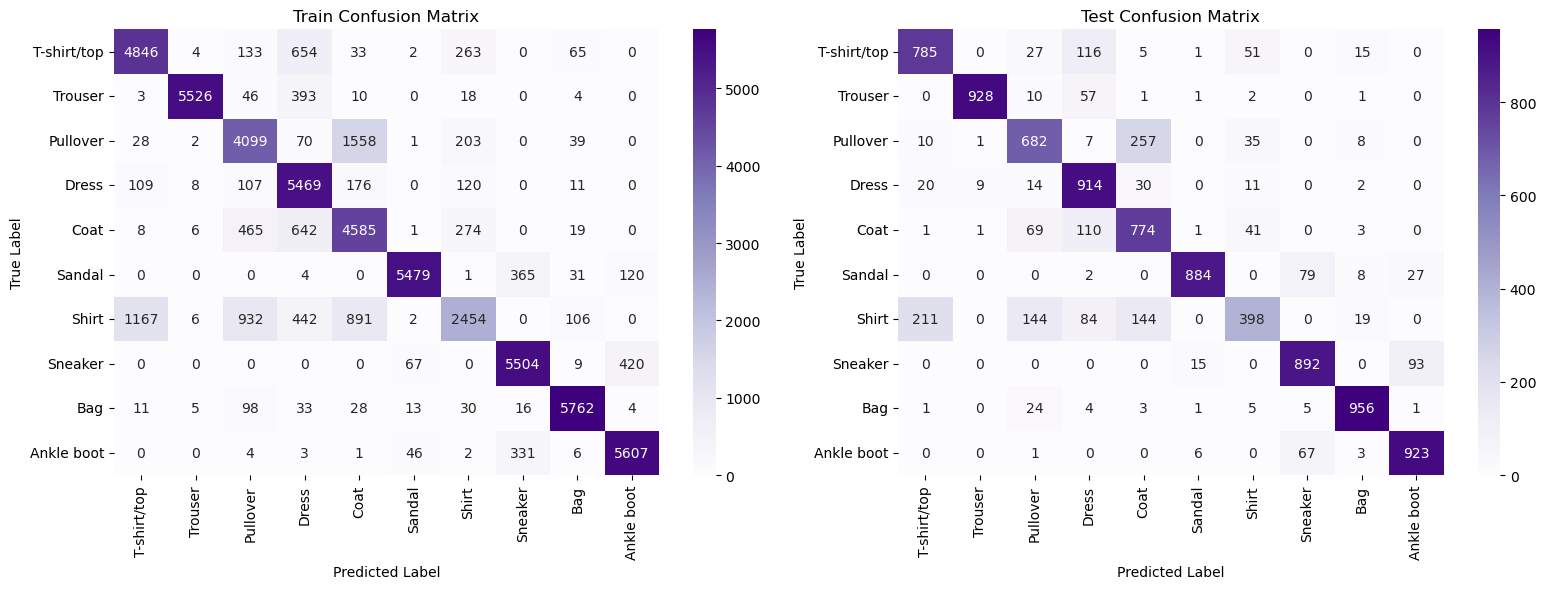

Train Accuracy: 0.8221833333333334
Test Accuracy: 0.8136

Classification Report on train set:
|              |   precision |   recall |   f1-score |      support |
|:-------------|------------:|---------:|-----------:|-------------:|
| T-shirt/top  |    0.785159 | 0.807667 |   0.796254 |  6000        |
| Trouser      |    0.994421 | 0.921    |   0.956304 |  6000        |
| Pullover     |    0.696635 | 0.683167 |   0.689835 |  6000        |
| Dress        |    0.709339 | 0.9115   |   0.797812 |  6000        |
| Coat         |    0.629635 | 0.764167 |   0.690408 |  6000        |
| Sandal       |    0.976475 | 0.913167 |   0.94376  |  6000        |
| Shirt        |    0.729272 | 0.409    |   0.524079 |  6000        |
| Sneaker      |    0.885457 | 0.917333 |   0.901113 |  6000        |
| Bag          |    0.952082 | 0.960333 |   0.95619  |  6000        |
| Ankle boot   |    0.911559 | 0.9345   |   0.922887 |  6000        |
| accuracy     |    0.822183 | 0.822183 |   0.822183 |     0.82218

In [ ]:
rf_model = RandomForestClassifier(max_features=56,max_depth=7, n_estimators=300, random_state=42, n_jobs=-1)
start_time = time.time()
rf_model.fit(x_train, y_train.values.ravel())
# Predict on train and test data
y_pred_train = rf_model.predict(x_train)
y_pred_test = rf_model.predict(x_test)
# End time for training
end_time = time.time()
# Calculate training time
train_time = end_time - start_time
# Plot confusion matrices for both train and test sets
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# Train confusion matrix
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(conf_matrix_train, annot=True,
            xticklabels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
            yticklabels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
            fmt="d", cmap="Purples",ax=axes[0])
axes[0].set_title("Train Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")
# Test confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix_test, annot=True, fmt="d",
            xticklabels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
            yticklabels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
            , cmap="Purples", ax=axes[1])
axes[1].set_title("Test Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")
plt.tight_layout()
plt.savefig(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\images_from_project\RFconfm.png")
plt.show()
# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
# Print accuracies
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
# Classification Report
report_train = classification_report(y_train, y_pred_train, target_names=class_names, output_dict=True)
report_test = classification_report(y_test, y_pred_test, target_names=class_names, output_dict=True)
df_train = pd.DataFrame(report_train).T
df_test = pd.DataFrame(report_test).T
print("\nClassification Report on train set:")
print(df_train.to_markdown())
print("\nClassification Report on test set:")
print(df_test.to_markdown())
print("\nTraining Time: {:.4f} seconds".format(train_time))



## Voting ##

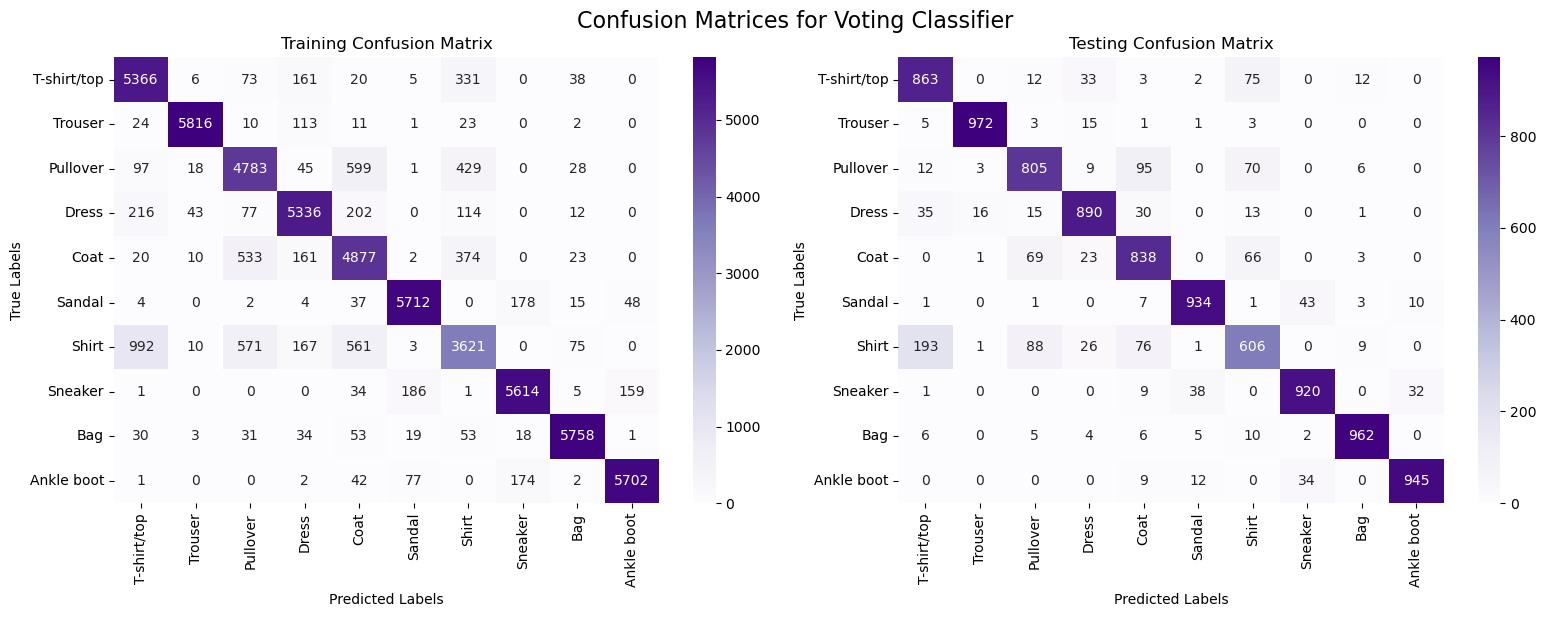

Training Accuracy: 0.8764
Test Accuracy: 0.8735

Classification Report on train set:
|              |   precision |   recall |   f1-score |      support |
|:-------------|------------:|---------:|-----------:|-------------:|
| T-shirt/top  |    0.794845 | 0.894333 |   0.841659 |  6000        |
| Trouser      |    0.984761 | 0.969333 |   0.976986 |  6000        |
| Pullover     |    0.786678 | 0.797167 |   0.791887 |  6000        |
| Dress        |    0.885937 | 0.889333 |   0.887632 |  6000        |
| Coat         |    0.757769 | 0.812833 |   0.784336 |  6000        |
| Sandal       |    0.951049 | 0.952    |   0.951524 |  6000        |
| Shirt        |    0.732107 | 0.6035   |   0.661612 |  6000        |
| Sneaker      |    0.938168 | 0.935667 |   0.936916 |  6000        |
| Bag          |    0.966432 | 0.959667 |   0.963037 |  6000        |
| Ankle boot   |    0.964805 | 0.950333 |   0.957515 |  6000        |
| accuracy     |    0.876417 | 0.876417 |   0.876417 |     0.876417 |
| mac

In [ ]:
# Define individual classifiers
pca = PCA(n_components=84)
x_train_pca = pca.fit_transform(x_train_MM_scaled)
x_test_pca = pca.transform(x_test_MM_scaled)

svm_clf = SVC(probability=True, kernel='rbf', C=1.0, random_state=42)  # Enable probabilities for SVM
softmax_clf = LogisticRegression(multi_class='multinomial',  max_iter=2500)
dt_clf = DecisionTreeClassifier(max_depth=7, random_state=42)

# Combine them into a Voting Classifier (soft voting)
voting_clf = VotingClassifier(estimators=[('svm', svm_clf),('softmax', softmax_clf),('decision_tree', dt_clf)],voting='hard')
# Fit the Voting Classifier on training data
start=time.time()
voting_clf.fit(x_train_pca, y_train.values.ravel())
end=time.time()

# Make predictions
y_pred_train = voting_clf.predict(x_train_pca)
y_pred_test = voting_clf.predict(x_test_pca)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
# Confusion Matrices for Training and Testing Set
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Confusion Matrix for Training Set
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Purples",
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title("Training Confusion Matrix")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")

# Confusion Matrix for Testing Set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Purples",
            xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title("Testing Confusion Matrix")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")

# Adjust layout
plt.tight_layout()
plt.suptitle("Confusion Matrices for Voting Classifier", fontsize=16, y=1.02)

plt.savefig(r"C:\Users\Ronu\OneDrive\Desktop\ML\final_project\images_from_project\voting_confusion_matrices.png")
plt.show()

# Print Training and Testing Accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification Report
report_train = classification_report(y_train, y_pred_train, target_names=class_names, output_dict=True)
report_test = classification_report(y_test, y_pred_test, target_names=class_names, output_dict=True)
df_train = pd.DataFrame(report_train).T
df_test = pd.DataFrame(report_test).T
print("\nClassification Report on train set:")
print(df_train.to_markdown())
print("\nClassification Report on test set:")
print(df_test.to_markdown())

print(f"Required time to train voting classifier: {end - start:.2f} seconds")